# Breast Cancer Detection



**Import ML packages**

In [1]:
# !pip install --ignore-installed blinker

In [2]:
#!pip install blinker

In [3]:
!pip install pca

In [4]:
!pip install --upgrade pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.8/165.8 kB 8.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 30.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 37.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 13.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 49.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 45.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 18.7 MB/s eta 0:00:00
   ━━━━

In [5]:
# numpy
import numpy as np
# pandas
import pandas as pd
from pandas.plotting import scatter_matrix
# matplotlib
import matplotlib.pyplot as plt
# seaborn
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
# scikit-learn
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

%matplotlib inline
plt.rcParams['figure.figsize'] = (7, 5)

**Load and Read Dataset**

In [6]:
# Load Dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data"
names = ['id', 'clump_thickness', 'uniform_cell_size', 'uniform_cell_shape',
       'marginal_adhesion', 'single_epithelial_size', 'bare_nuclei',
       'bland_chromatin', 'normal_nucleoli', 'mitoses', 'class']
# Read Dataset
df = pd.read_csv(url, names=names)
df.head(10)

id  clump_thickness  uniform_cell_size  uniform_cell_shape  \
0  1000025                5                  1                   1   
1  1002945                5                  4                   4   
2  1015425                3                  1                   1   
3  1016277                6                  8                   8   
4  1017023                4                  1                   1   
5  1017122                8                 10                  10   
6  1018099                1                  1                   1   
7  1018561                2                  1                   2   
8  1033078                2                  1                   1   
9  1033078                4                  2                   1   

   marginal_adhesion  single_epithelial_size bare_nuclei  bland_chromatin  \
0                  1                       2           1                3   
1                  5                       7          10                3   
2                  1                       2           2                3   
3                  1                       3           4                3   
4                  3                       2           1                3   
5                  8                       7          10                9   
6                  1                       2          10                3   
7                  1                       2           1                3   
8                  1                       2           1                1   
9                  1                       2           1                2   

   normal_nucleoli  mitoses  class  
0                1        1      2  
1                2        1      2  
2                1        1      2  
3                7        1      2  
4                1        1      2  
5                7        1      4  
6                1        1      2  
7                1        1      2  
8                1        5      2  
9                1        1      2

In [7]:
# Shape of the Dataset
df.shape

(699, 11)

**Information about the Dataset**

In [8]:
df.info()
# Number of duplicated rows
print("Number of duplicated rows is: ", df.duplicated().sum())
# Number of rows with NaNs
print("Number of rows with NaNs is: ", df.isna().any(axis=1).sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   id                      699 non-null    int64 
 1   clump_thickness         699 non-null    int64 
 2   uniform_cell_size       699 non-null    int64 
 3   uniform_cell_shape      699 non-null    int64 
 4   marginal_adhesion       699 non-null    int64 
 5   single_epithelial_size  699 non-null    int64 
 6   bare_nuclei             699 non-null    object
 7   bland_chromatin         699 non-null    int64 
 8   normal_nucleoli         699 non-null    int64 
 9   mitoses                 699 non-null    int64 
 10  class                   699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB
Number of duplicated rows is:  8
Number of rows with NaNs is:  0


In [9]:
# Columns in the dataset
df.columns

Index(['id', 'clump_thickness', 'uniform_cell_size', 'uniform_cell_shape',
       'marginal_adhesion', 'single_epithelial_size', 'bare_nuclei',
       'bland_chromatin', 'normal_nucleoli', 'mitoses', 'class'],
      dtype='object')

**Data pre-processing**

In [10]:
df.drop(['id'],axis=1,inplace = True)

In [11]:
#Diagnosis class Malignant = 4 and Benign = 2
#The number of Benign and Maglinant cases from the dataset
df['class'].value_counts()

class
2    458
4    241
Name: count, dtype: int64

In [12]:
df['bare_nuclei'].value_counts()

bare_nuclei
1     402
10    132
2      30
5      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: count, dtype: int64

**Handling missing values**

In [13]:
df[df['bare_nuclei'] == '?']

clump_thickness  uniform_cell_size  uniform_cell_shape  \
23                 8                  4                   5   
40                 6                  6                   6   
139                1                  1                   1   
145                1                  1                   3   
158                1                  1                   2   
164                5                  1                   1   
235                3                  1                   4   
249                3                  1                   1   
275                3                  1                   3   
292                8                  8                   8   
294                1                  1                   1   
297                5                  4                   3   
315                4                  6                   5   
321                3                  1                   1   
411                1                  1                   1   
617                1                  1                   1   

     marginal_adhesion  single_epithelial_size bare_nuclei  bland_chromatin  \
23                   1                       2           ?                7   
40                   9                       6           ?                7   
139                  1                       1           ?                2   
145                  1                       2           ?                2   
158                  1                       3           ?                1   
164                  1                       2           ?                3   
235                  1                       2           ?                3   
249                  1                       2           ?                3   
275                  1                       2           ?                2   
292                  1                       2           ?                6   
294                  1                       2           ?                2   
297                  1                       2           ?                2   
315                  6                       7           ?                4   
321                  1                       2           ?                3   
411                  1                       1           ?                2   
617                  1                       1           ?                1   

     normal_nucleoli  mitoses  class  
23                 3        1      4  
40                 8        1      2  
139                1        1      2  
145                1        1      2  
158                1        1      2  
164                1        1      2  
235                1        1      2  
249                1        1      2  
275                1        1      2  
292               10        1      4  
294                1        1      2  
297                3        1      2  
315                9        1      2  
321                1        1      2  
411                1        1      2  
617                1        1      2

In [14]:
df[df['bare_nuclei'] == '?'].sum()

clump_thickness                         54
uniform_cell_size                       39
uniform_cell_shape                      46
marginal_adhesion                       29
single_epithelial_size                  39
bare_nuclei               ????????????????
bland_chromatin                         50
normal_nucleoli                         44
mitoses                                 16
class                                   36
dtype: object

In [15]:
df.replace('?',np.nan,inplace=True)

In [16]:
df['bare_nuclei'][23]

nan

In [17]:
df.isna().sum()

clump_thickness            0
uniform_cell_size          0
uniform_cell_shape         0
marginal_adhesion          0
single_epithelial_size     0
bare_nuclei               16
bland_chromatin            0
normal_nucleoli            0
mitoses                    0
class                      0
dtype: int64

In [18]:
df.fillna(method='ffill', inplace=True)

In [19]:
df.isna().sum()

clump_thickness           0
uniform_cell_size         0
uniform_cell_shape        0
marginal_adhesion         0
single_epithelial_size    0
bare_nuclei               0
bland_chromatin           0
normal_nucleoli           0
mitoses                   0
class                     0
dtype: int64

In [20]:
df['bare_nuclei'] = df['bare_nuclei'].astype('int64')

**Descriptive Statistics**

In [107]:
desc_stats=df.describe().transpose()
desc_stats

count      mean       std  min  25%  50%  75%   max
clump_thickness         699.0  4.417740  2.815741  1.0  2.0  4.0  6.0  10.0
uniform_cell_size       699.0  3.134478  3.051459  1.0  1.0  1.0  5.0  10.0
uniform_cell_shape      699.0  3.207439  2.971913  1.0  1.0  1.0  5.0  10.0
marginal_adhesion       699.0  2.806867  2.855379  1.0  1.0  1.0  4.0  10.0
single_epithelial_size  699.0  3.216023  2.214300  1.0  2.0  2.0  4.0  10.0
bare_nuclei             699.0  3.529328  3.635260  1.0  1.0  1.0  6.0  10.0
bland_chromatin         699.0  3.437768  2.438364  1.0  2.0  3.0  5.0  10.0
normal_nucleoli         699.0  2.866953  3.053634  1.0  1.0  1.0  4.0  10.0
mitoses                 699.0  1.589413  1.715078  1.0  1.0  1.0  1.0  10.0
class                   699.0  2.689557  0.951273  2.0  2.0  2.0  4.0   4.0

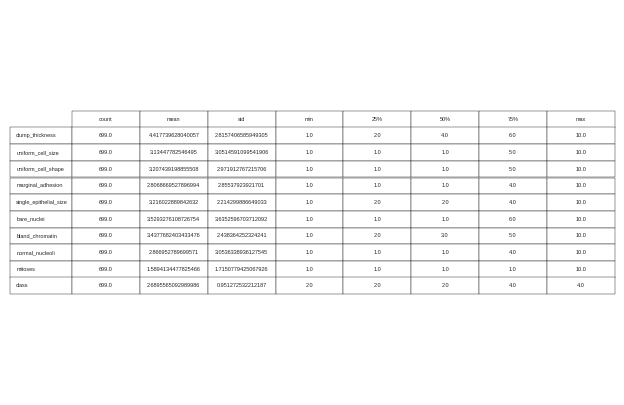

In [105]:
# Plot the table
fig, ax = plt.subplots(figsize=(7, 5))  # Adjust the size as needed
ax.axis('tight')
ax.axis('off')
table = (ax.table(cellText=desc_stats.values, colLabels=desc_stats.columns, rowLabels=desc_stats.index, loc='center',
    cellLoc='center'))




**Exploratory Data Analysis**

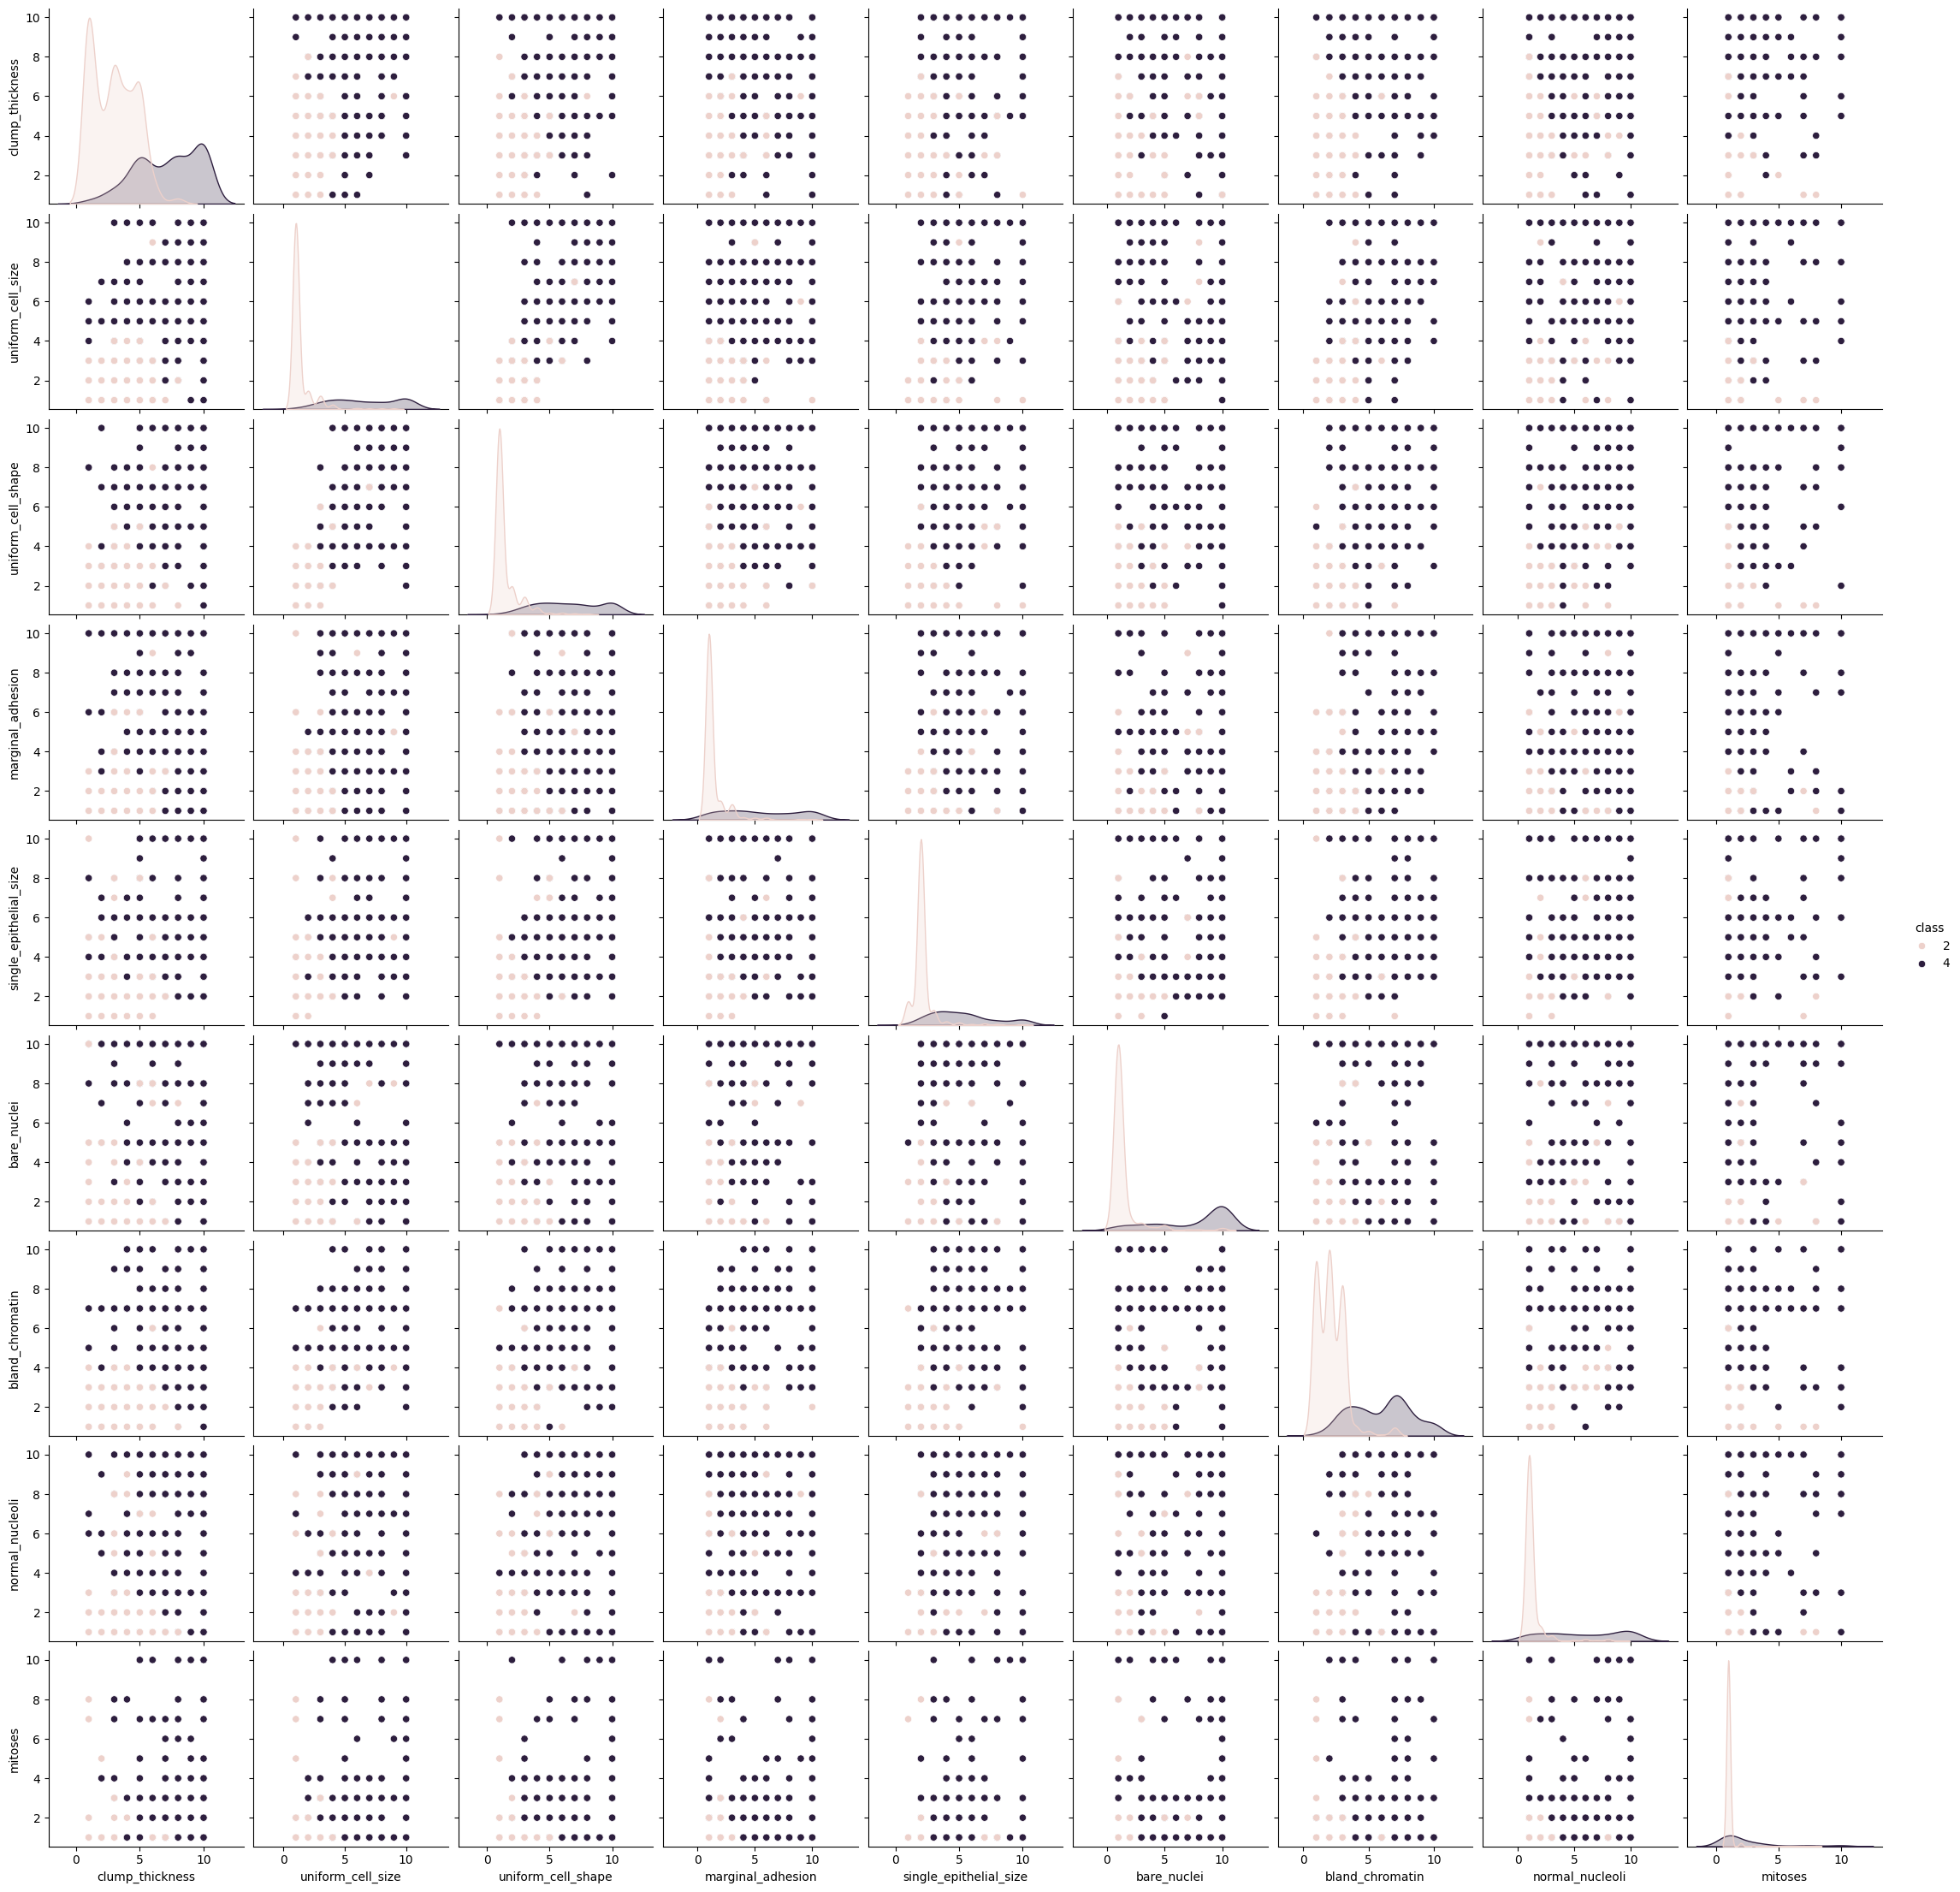

In [23]:
sns.pairplot(df, hue='class')
plt.show()

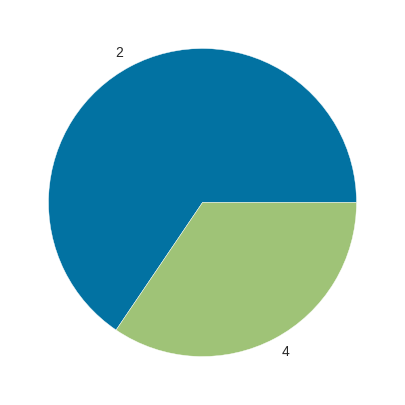

In [78]:
y =df['class']
y.value_counts().plot(kind='pie',figsize=(7, 5))
plt.ylabel('')
plt.show()

**Standardize the Data**

In [25]:
#Xs = StandardScaler().fit_transform(df)
#Xcols = df.columns
#df = pd.DataFrame(Xs)
#df.columns = Xcols
#df.head(10)

In [26]:
df.describe().transpose()

count      mean       std  min  25%  50%  75%   max
clump_thickness         699.0  4.417740  2.815741  1.0  2.0  4.0  6.0  10.0
uniform_cell_size       699.0  3.134478  3.051459  1.0  1.0  1.0  5.0  10.0
uniform_cell_shape      699.0  3.207439  2.971913  1.0  1.0  1.0  5.0  10.0
marginal_adhesion       699.0  2.806867  2.855379  1.0  1.0  1.0  4.0  10.0
single_epithelial_size  699.0  3.216023  2.214300  1.0  2.0  2.0  4.0  10.0
bare_nuclei             699.0  3.529328  3.635260  1.0  1.0  1.0  6.0  10.0
bland_chromatin         699.0  3.437768  2.438364  1.0  2.0  3.0  5.0  10.0
normal_nucleoli         699.0  2.866953  3.053634  1.0  1.0  1.0  4.0  10.0
mitoses                 699.0  1.589413  1.715078  1.0  1.0  1.0  1.0  10.0
class                   699.0  2.689557  0.951273  2.0  2.0  2.0  4.0   4.0

**Observations and variables**

In [27]:
observations = list(df.index)
variables = list(df.columns)

**Box and Whisker Plots**

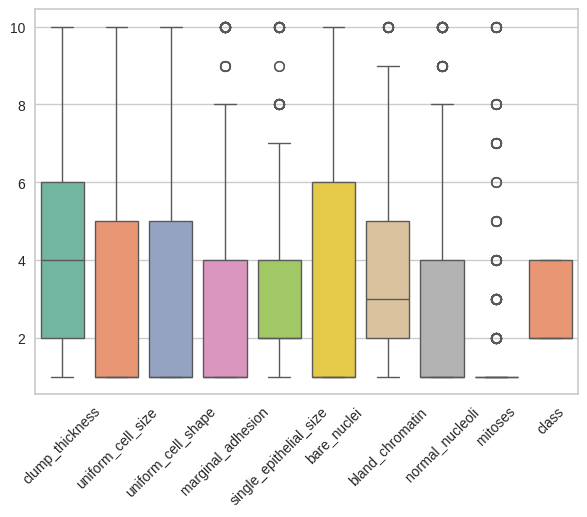

In [108]:
ax = plt.figure(figsize=(7, 5))
ax = sns.boxplot(data=df, orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

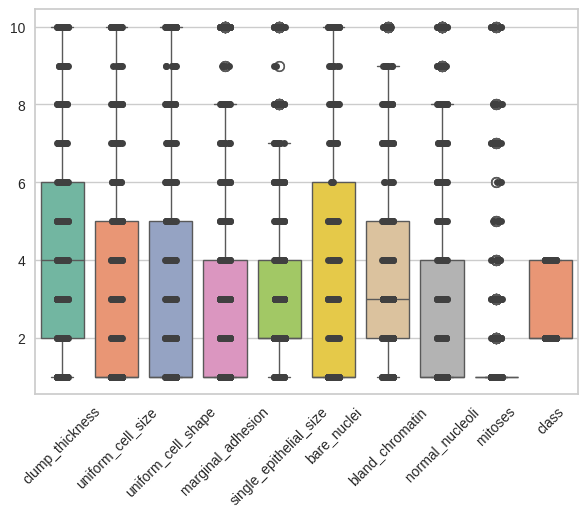

In [109]:
# Swarmplot
ax = plt.figure(figsize=(7, 5))
ax = sns.boxplot(data=df, orient="v", palette="Set2")
ax = sns.stripplot(data=df, color=".25")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

**Bivariate Data Analysis**

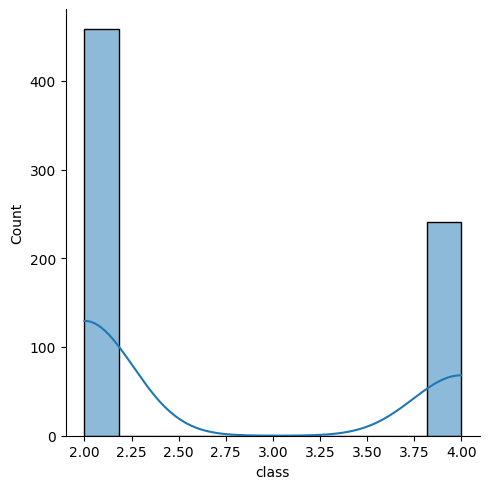

In [30]:
sns.displot(df['class'],kde=True)

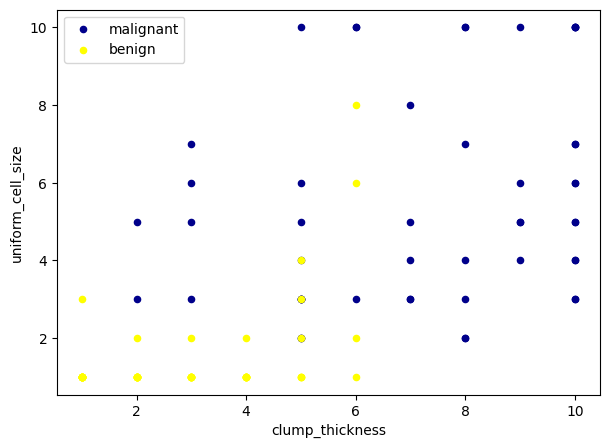

In [31]:
ax = df[df['class'] == 4][0:50].plot(kind='scatter', x='clump_thickness', y='uniform_cell_size', color='DarkBlue', label='malignant');
df[df['class'] == 2][0:50].plot(kind='scatter', x='clump_thickness', y='uniform_cell_size', color='Yellow', label='benign', ax=ax);
plt.show()

**Multivariate Data Analysis**

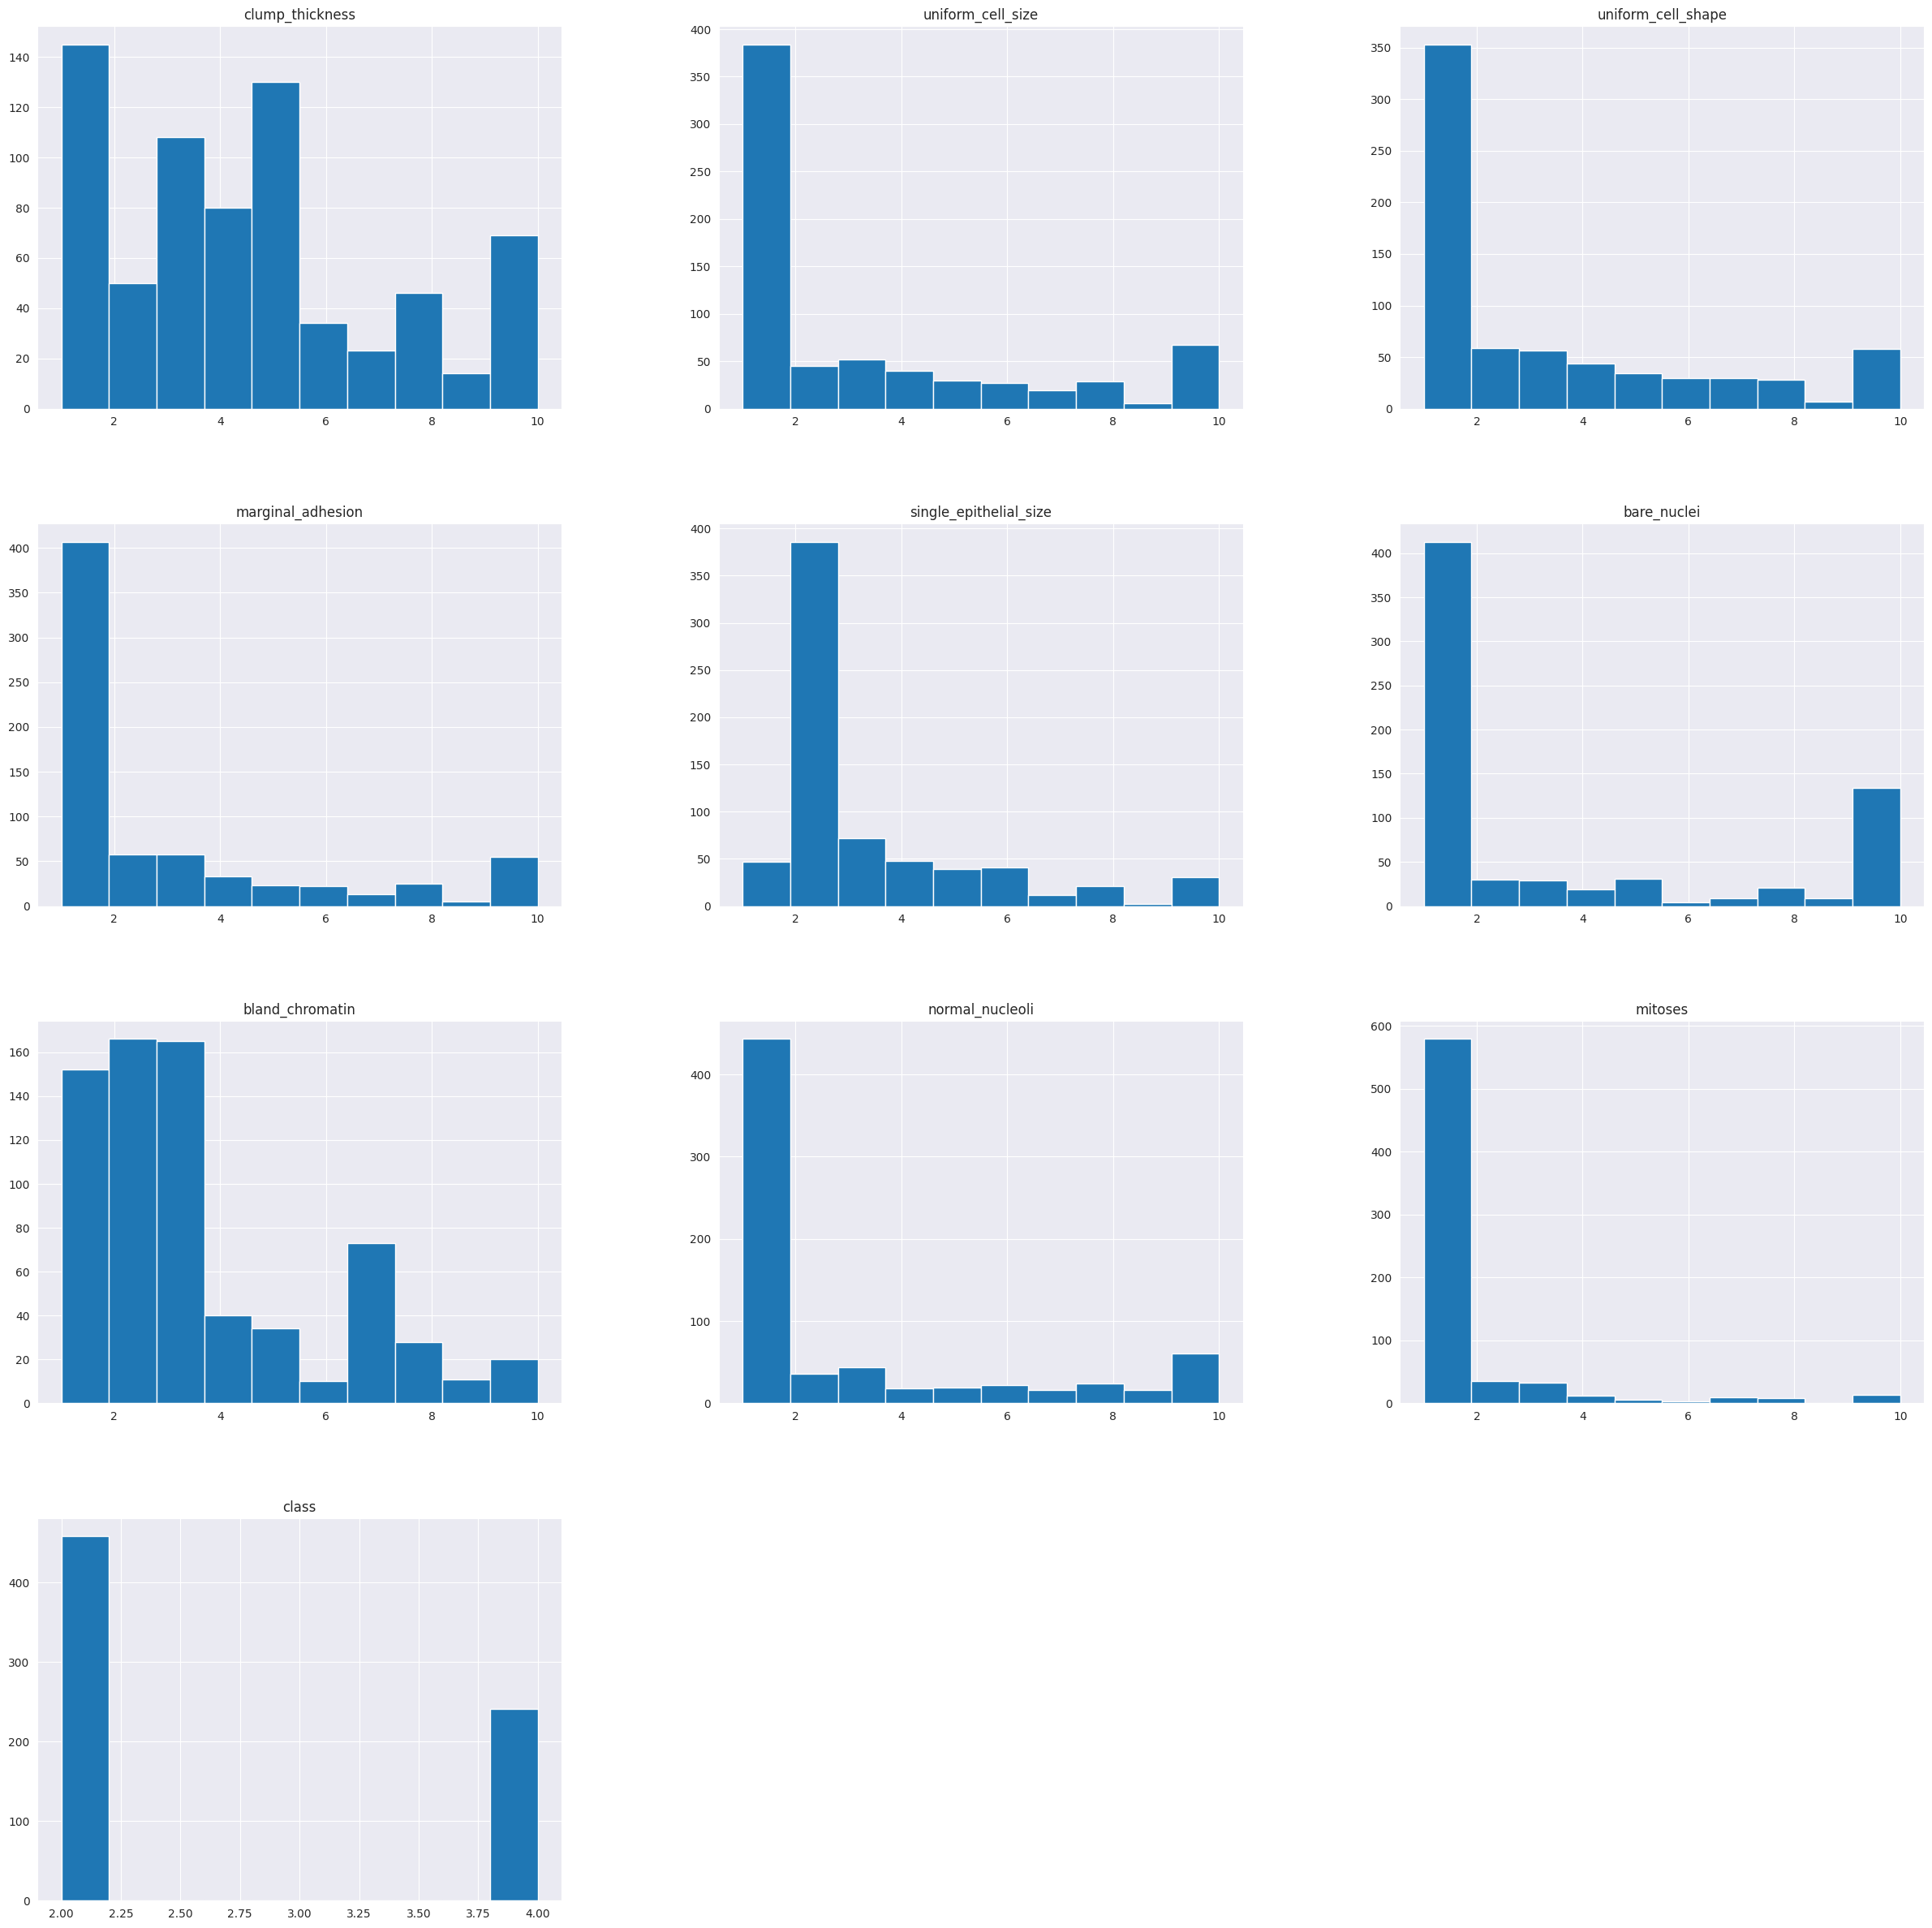

In [32]:
# Plot histograms for each variable
sns.set_style('darkgrid')
df.hist(figsize=(30,30))
plt.show()

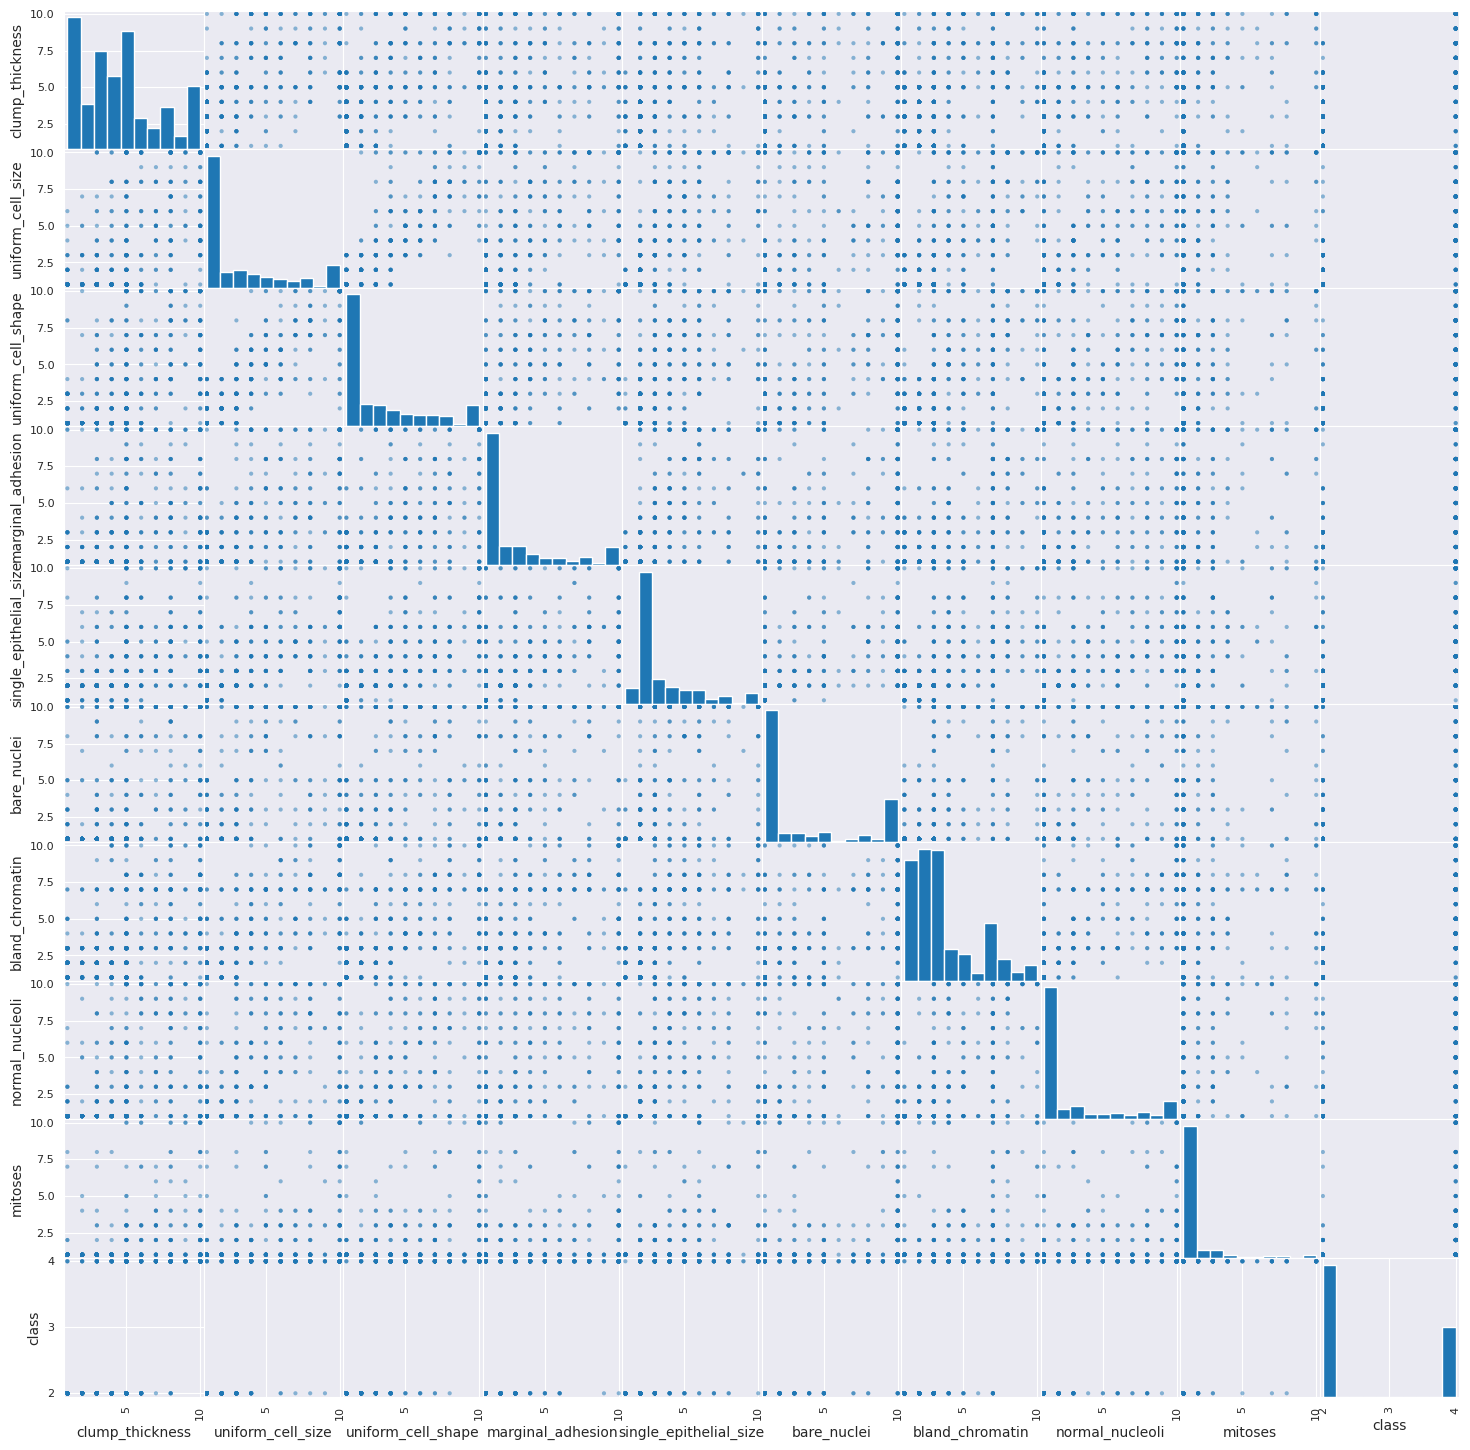

In [33]:
# Create scatter plot matrix
scatter_matrix(df, figsize = (18,18))
plt.show()

<Axes: >

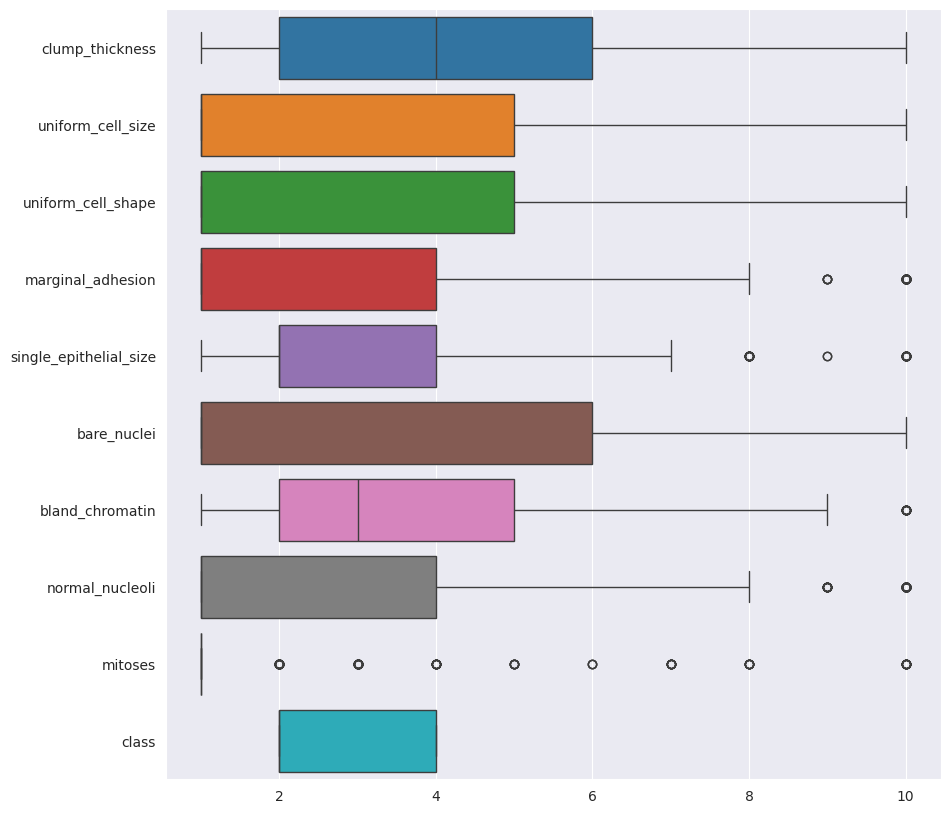

In [34]:
plt.figure(figsize=(10,10))
sns.boxplot(data=df,orient='h')

**Correlation Matrix**

In [35]:
df.corr()

clump_thickness  uniform_cell_size  \
clump_thickness                1.000000           0.644913   
uniform_cell_size              0.644913           1.000000   
uniform_cell_shape             0.654589           0.906882   
marginal_adhesion              0.486356           0.705582   
single_epithelial_size         0.521816           0.751799   
bare_nuclei                    0.583571           0.681309   
bland_chromatin                0.558428           0.755721   
normal_nucleoli                0.535835           0.722865   
mitoses                        0.350034           0.458693   
class                          0.716001           0.817904   

                        uniform_cell_shape  marginal_adhesion  \
clump_thickness                   0.654589           0.486356   
uniform_cell_size                 0.906882           0.705582   
uniform_cell_shape                1.000000           0.683079   
marginal_adhesion                 0.683079           1.000000   
single_epithelial_size            0.719668           0.599599   
bare_nuclei                       0.701137           0.663669   
bland_chromatin                   0.735948           0.666715   
normal_nucleoli                   0.719446           0.603352   
mitoses                           0.438911           0.417633   
class                             0.818934           0.696800   

                        single_epithelial_size  bare_nuclei  bland_chromatin  \
clump_thickness                       0.521816     0.583571         0.558428   
uniform_cell_size                     0.751799     0.681309         0.755721   
uniform_cell_shape                    0.719668     0.701137         0.735948   
marginal_adhesion                     0.599599     0.663669         0.666715   
single_epithelial_size                1.000000     0.579340         0.616102   
bare_nuclei                           0.579340     1.000000         0.671398   
bland_chromatin                       0.616102     0.671398         1.000000   
normal_nucleoli                       0.628881     0.571895         0.665878   
mitoses                               0.479101     0.337078         0.344169   
class                                 0.682785     0.807394         0.756616   

                        normal_nucleoli   mitoses     class  
clump_thickness                0.535835  0.350034  0.716001  
uniform_cell_size              0.722865  0.458693  0.817904  
uniform_cell_shape             0.719446  0.438911  0.818934  
marginal_adhesion              0.603352  0.417633  0.696800  
single_epithelial_size         0.628881  0.479101  0.682785  
bare_nuclei                    0.571895  0.337078  0.807394  
bland_chromatin                0.665878  0.344169  0.756616  
normal_nucleoli                1.000000  0.428336  0.712244  
mitoses                        0.428336  1.000000  0.423170  
class                          0.712244  0.423170  1.000000

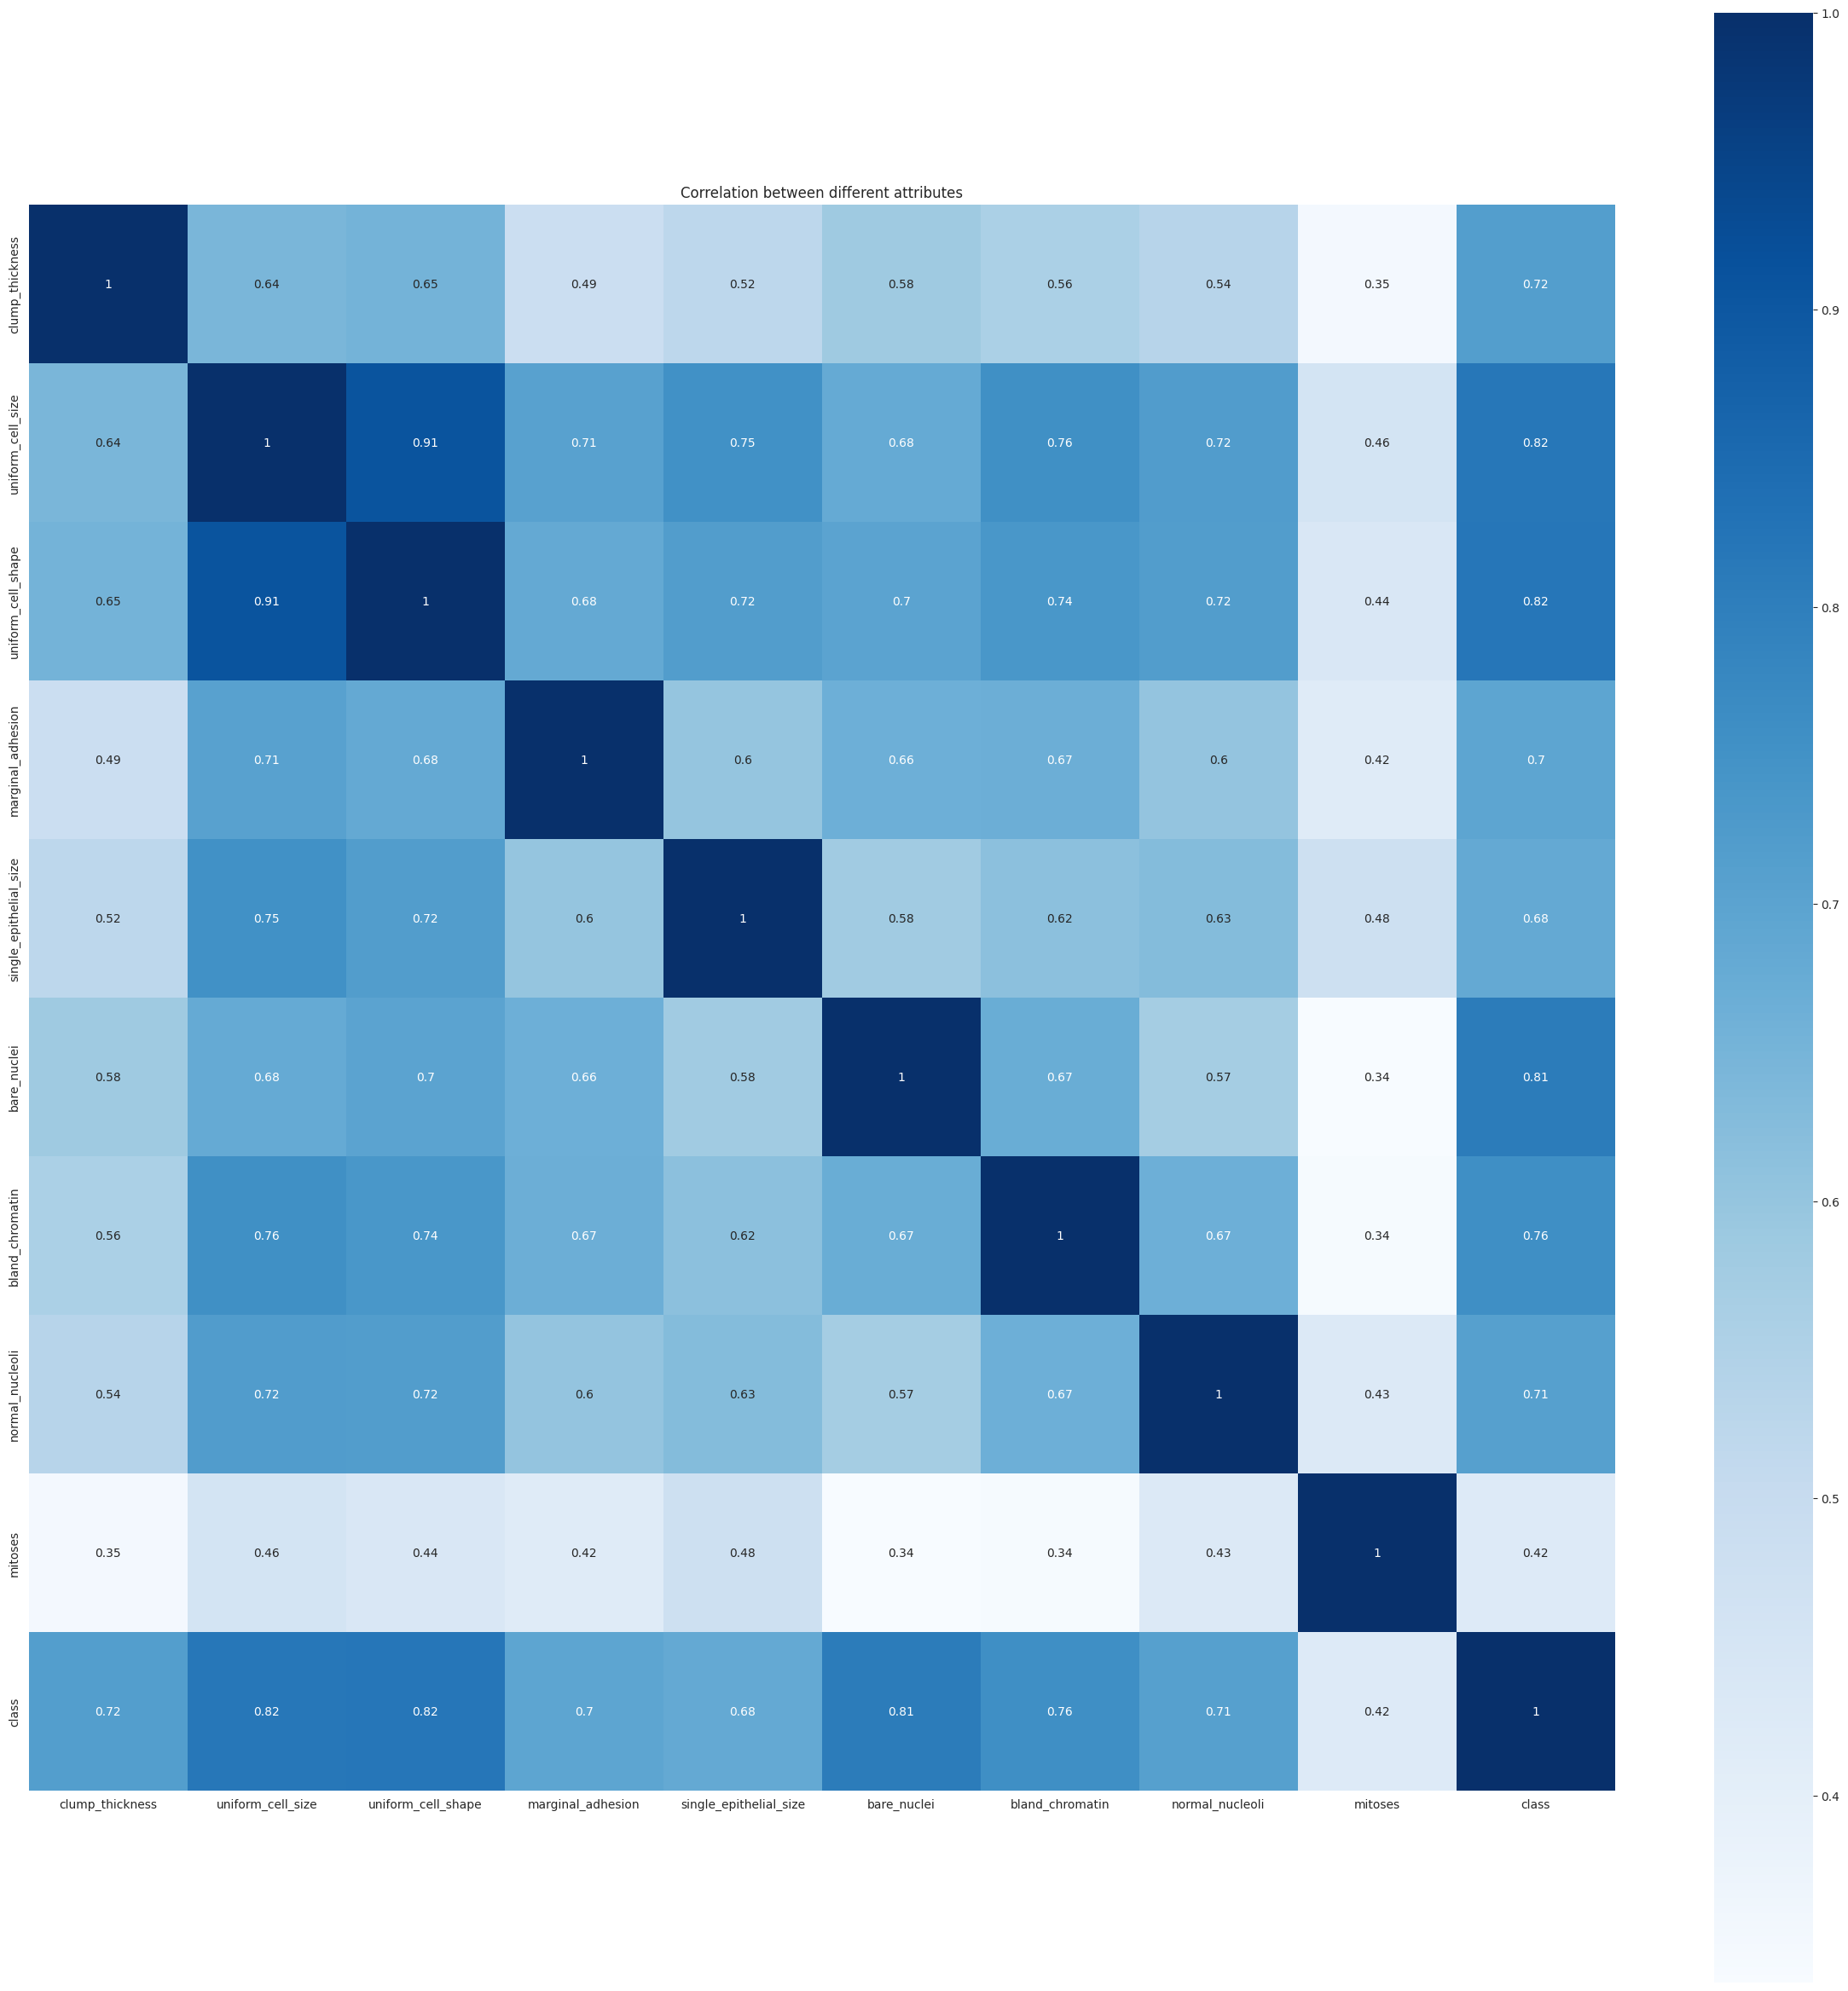

In [36]:
plt.figure(figsize=(30,30))
cor = df.corr()
sns.heatmap(cor,vmax=1,square = True,annot=True, cmap=plt.cm.Blues)
plt.title('Correlation between different attributes')
plt.show()

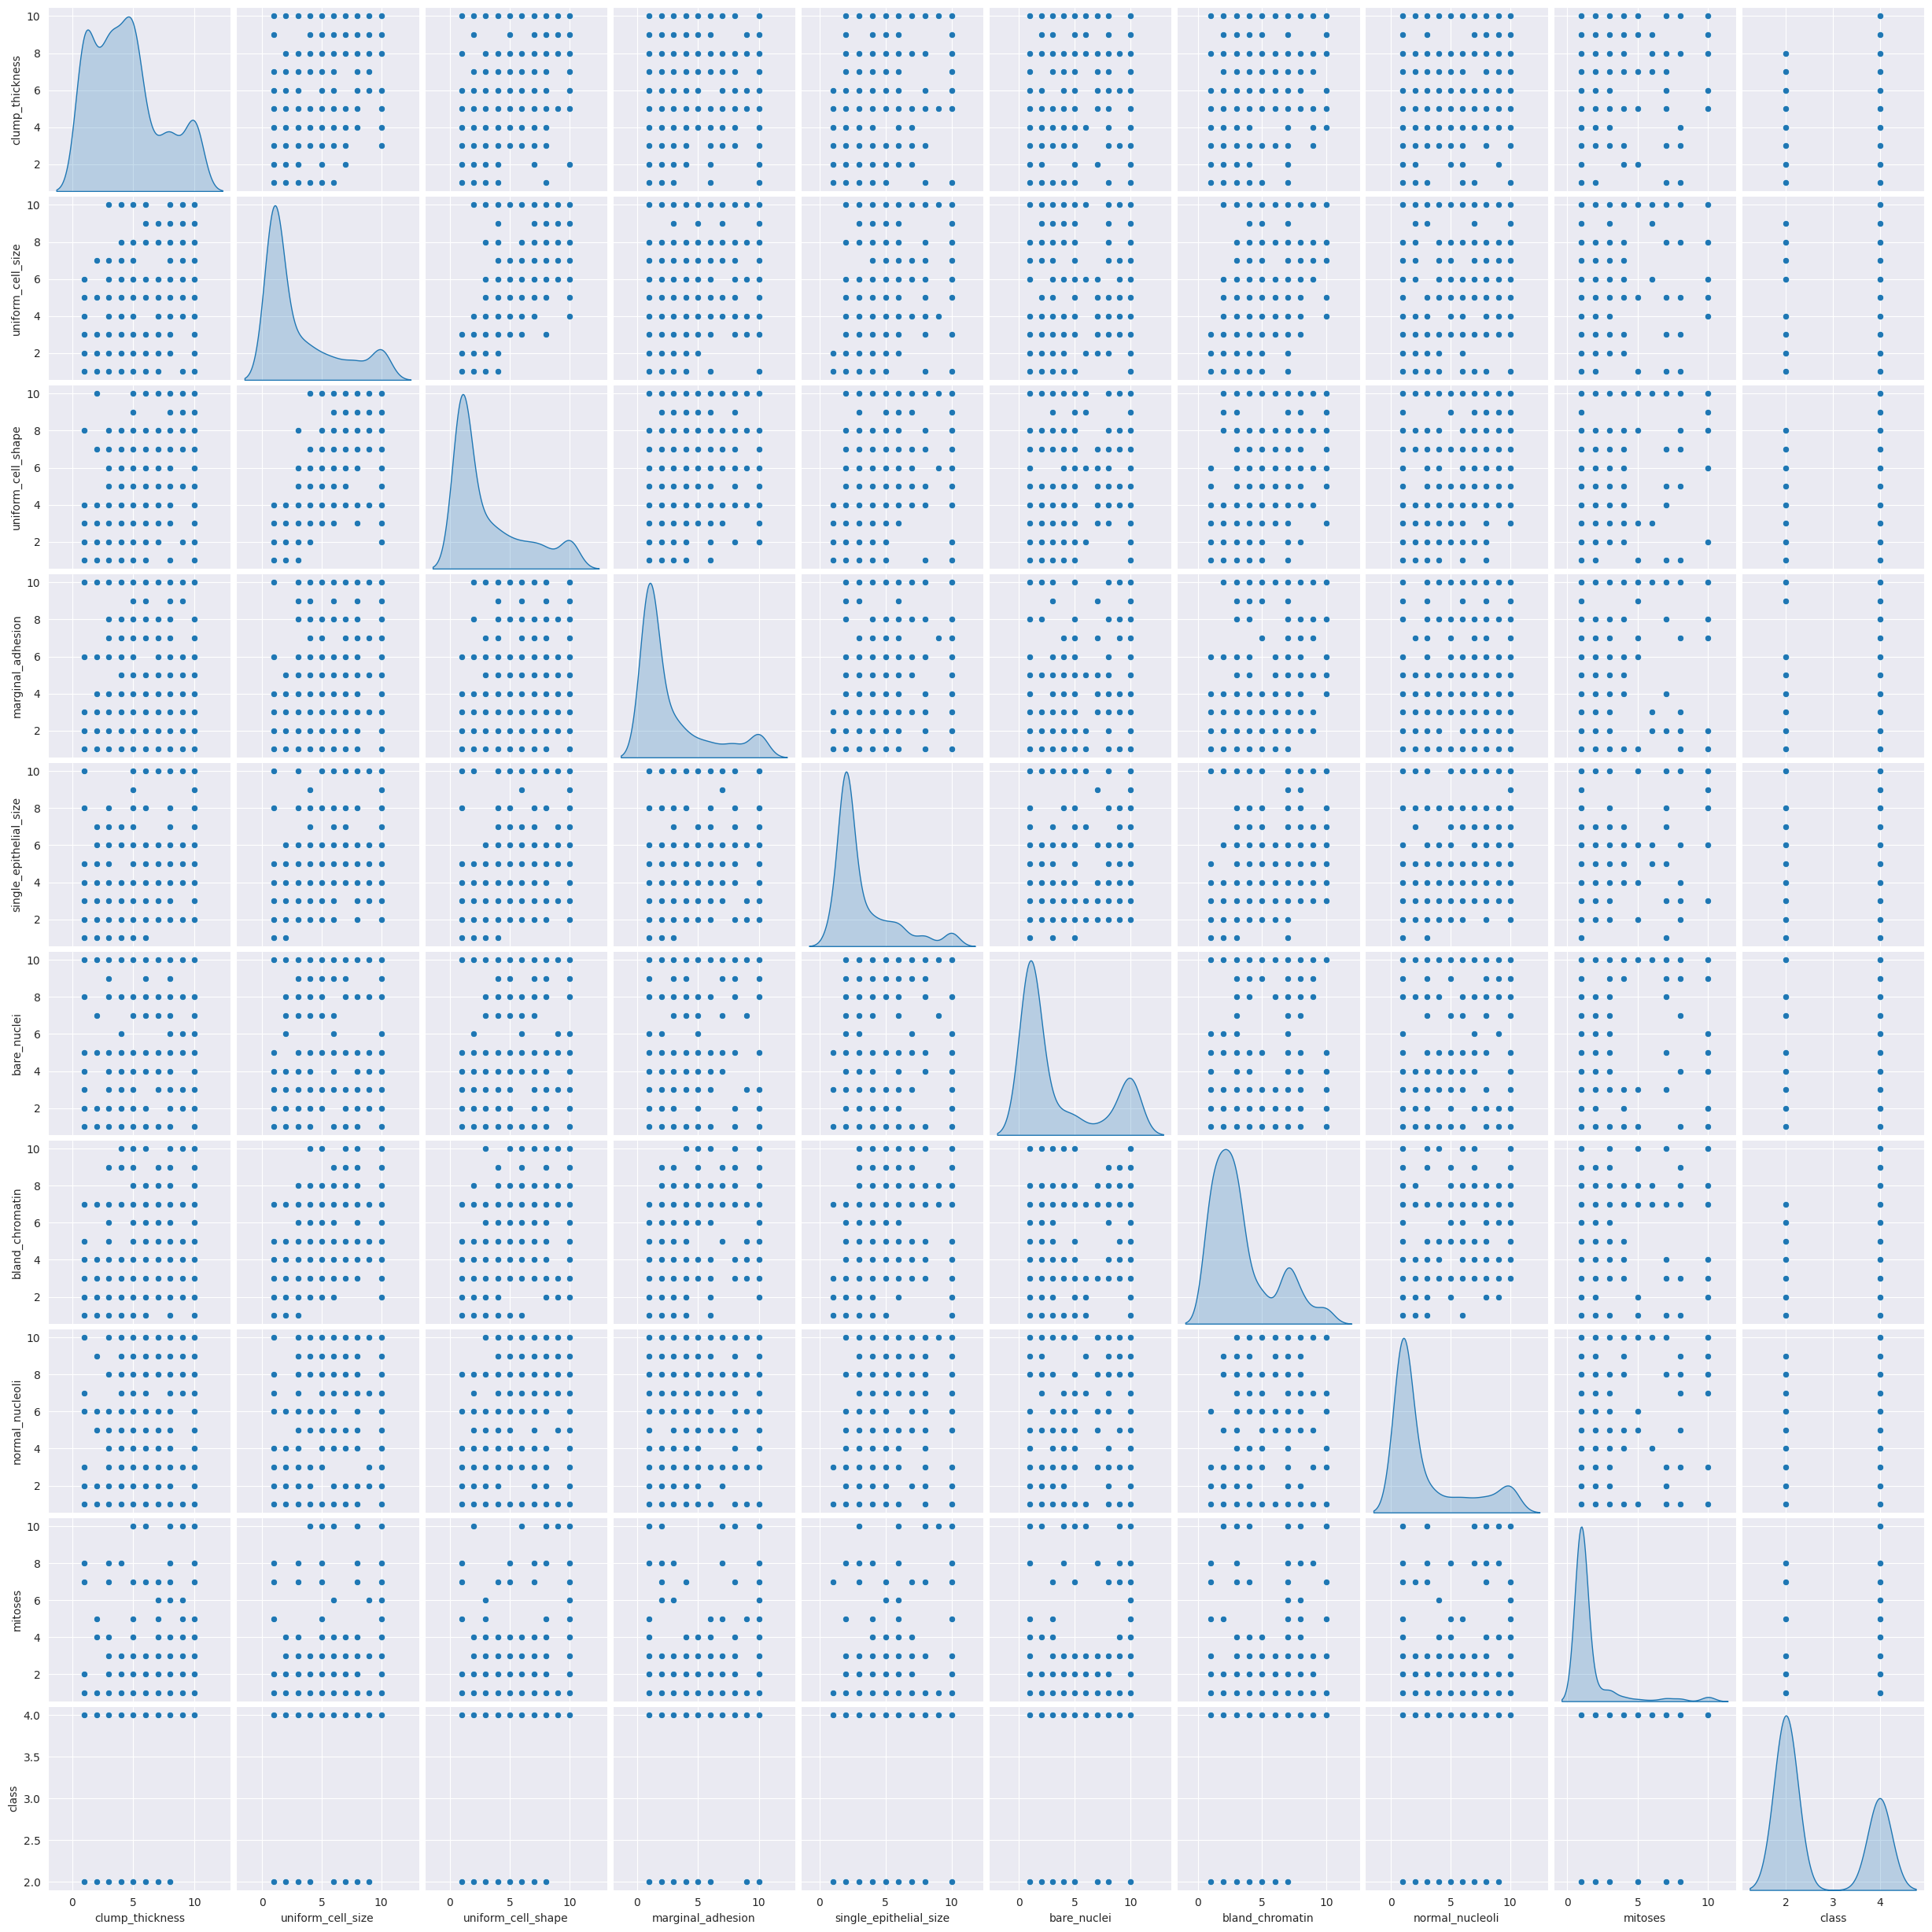

In [37]:
sns.pairplot(df,diag_kind='kde')

In [38]:
#Correlation with output variable
cor_target = abs(cor["class"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0]
relevant_features

clump_thickness           0.716001
uniform_cell_size         0.817904
uniform_cell_shape        0.818934
marginal_adhesion         0.696800
single_epithelial_size    0.682785
bare_nuclei               0.807394
bland_chromatin           0.756616
normal_nucleoli           0.712244
mitoses                   0.423170
class                     1.000000
Name: class, dtype: float64

**Perform PCA**

In [39]:
data = df

# Separate features from the target variable
X = df
y = data['class']

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Calculate the explained variance for each component
explained_variance_ratio = pca.explained_variance_ratio_

In [40]:
explained_variance_ratio

array([0.67053585, 0.07930063, 0.05472084, 0.04739891, 0.03804756,
       0.03170385, 0.02973306, 0.0262389 , 0.01345214, 0.00886827])

**Scree Plot**

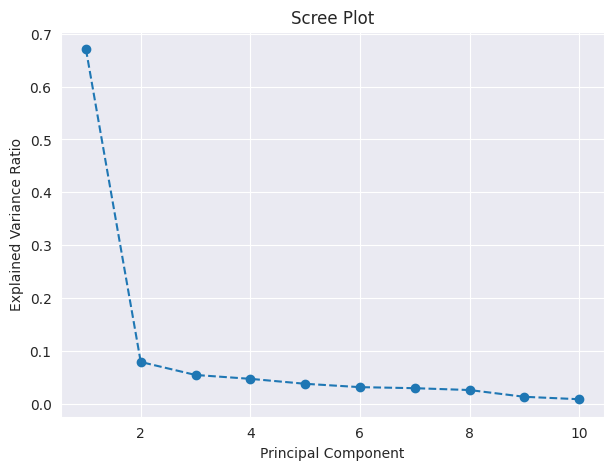

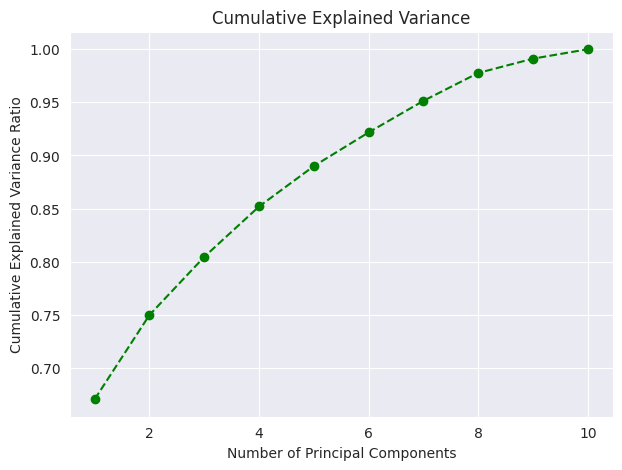

In [41]:
# Plot the Scree Plot
plt.figure(figsize=(7, 5))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)
plt.show()

# Optional: Display cumulative explained variance to help decide the number of components to retain
cumulative_variance = np.cumsum(explained_variance_ratio)

plt.figure(figsize=(7, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--', color='green')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.grid(True)
plt.show()

**Biplot**

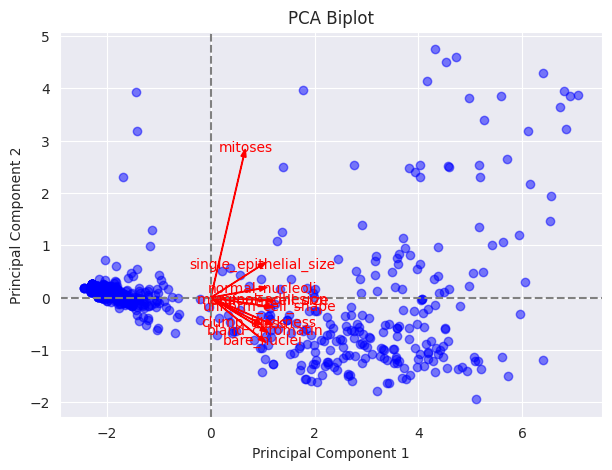

In [42]:
# Biplot
def biplot(X, pca, labels=None):
    plt.figure(figsize=(7, 5))
    plt.scatter(X[:, 0], X[:, 1], c='blue', alpha=0.5)  # Scatter plot of the data points
    feature_vectors = pca.components_.T  # Transpose to get vectors for each feature

    # Plot arrows representing each feature
    for i, v in enumerate(feature_vectors):
        plt.arrow(0, 0, v[0] * 3, v[1] * 3, color='r', width=0.01, head_width=0.1)
        if labels is not None:
            plt.text(v[0] * 3.2, v[1] * 3.2, labels[i], color='red', ha='center', va='center')

    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('PCA Biplot')
    plt.grid(True)
    plt.axhline(0, color='grey', linestyle='--')
    plt.axvline(0, color='grey', linestyle='--')
    plt.show()

biplot(X_pca, pca, labels=X.columns)

[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >The PCA reduction is performed to capture [85.0%] explained variance using the [10] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [4] that covers the [85.00%] explained variance.
[pca] >The PCA reduction is performed on the [10] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[4]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


[scatterd] >INFO> Create scatterplot


[pca]> [WARNING]: De parameter <label> is deprecated and will not be supported in future version.
[scatterd]> WARNING use the standardized verbose status. The status [1-6] will be deprecated in future versions.


(<Figure size 2500x1500 with 1 Axes>,
 <Axes: title={'center': '4 Principal Components explain [90.53%] of the variance'}, xlabel='PC1 (68.9% expl.var)', ylabel='PC2 (7.37% expl.var)'>)

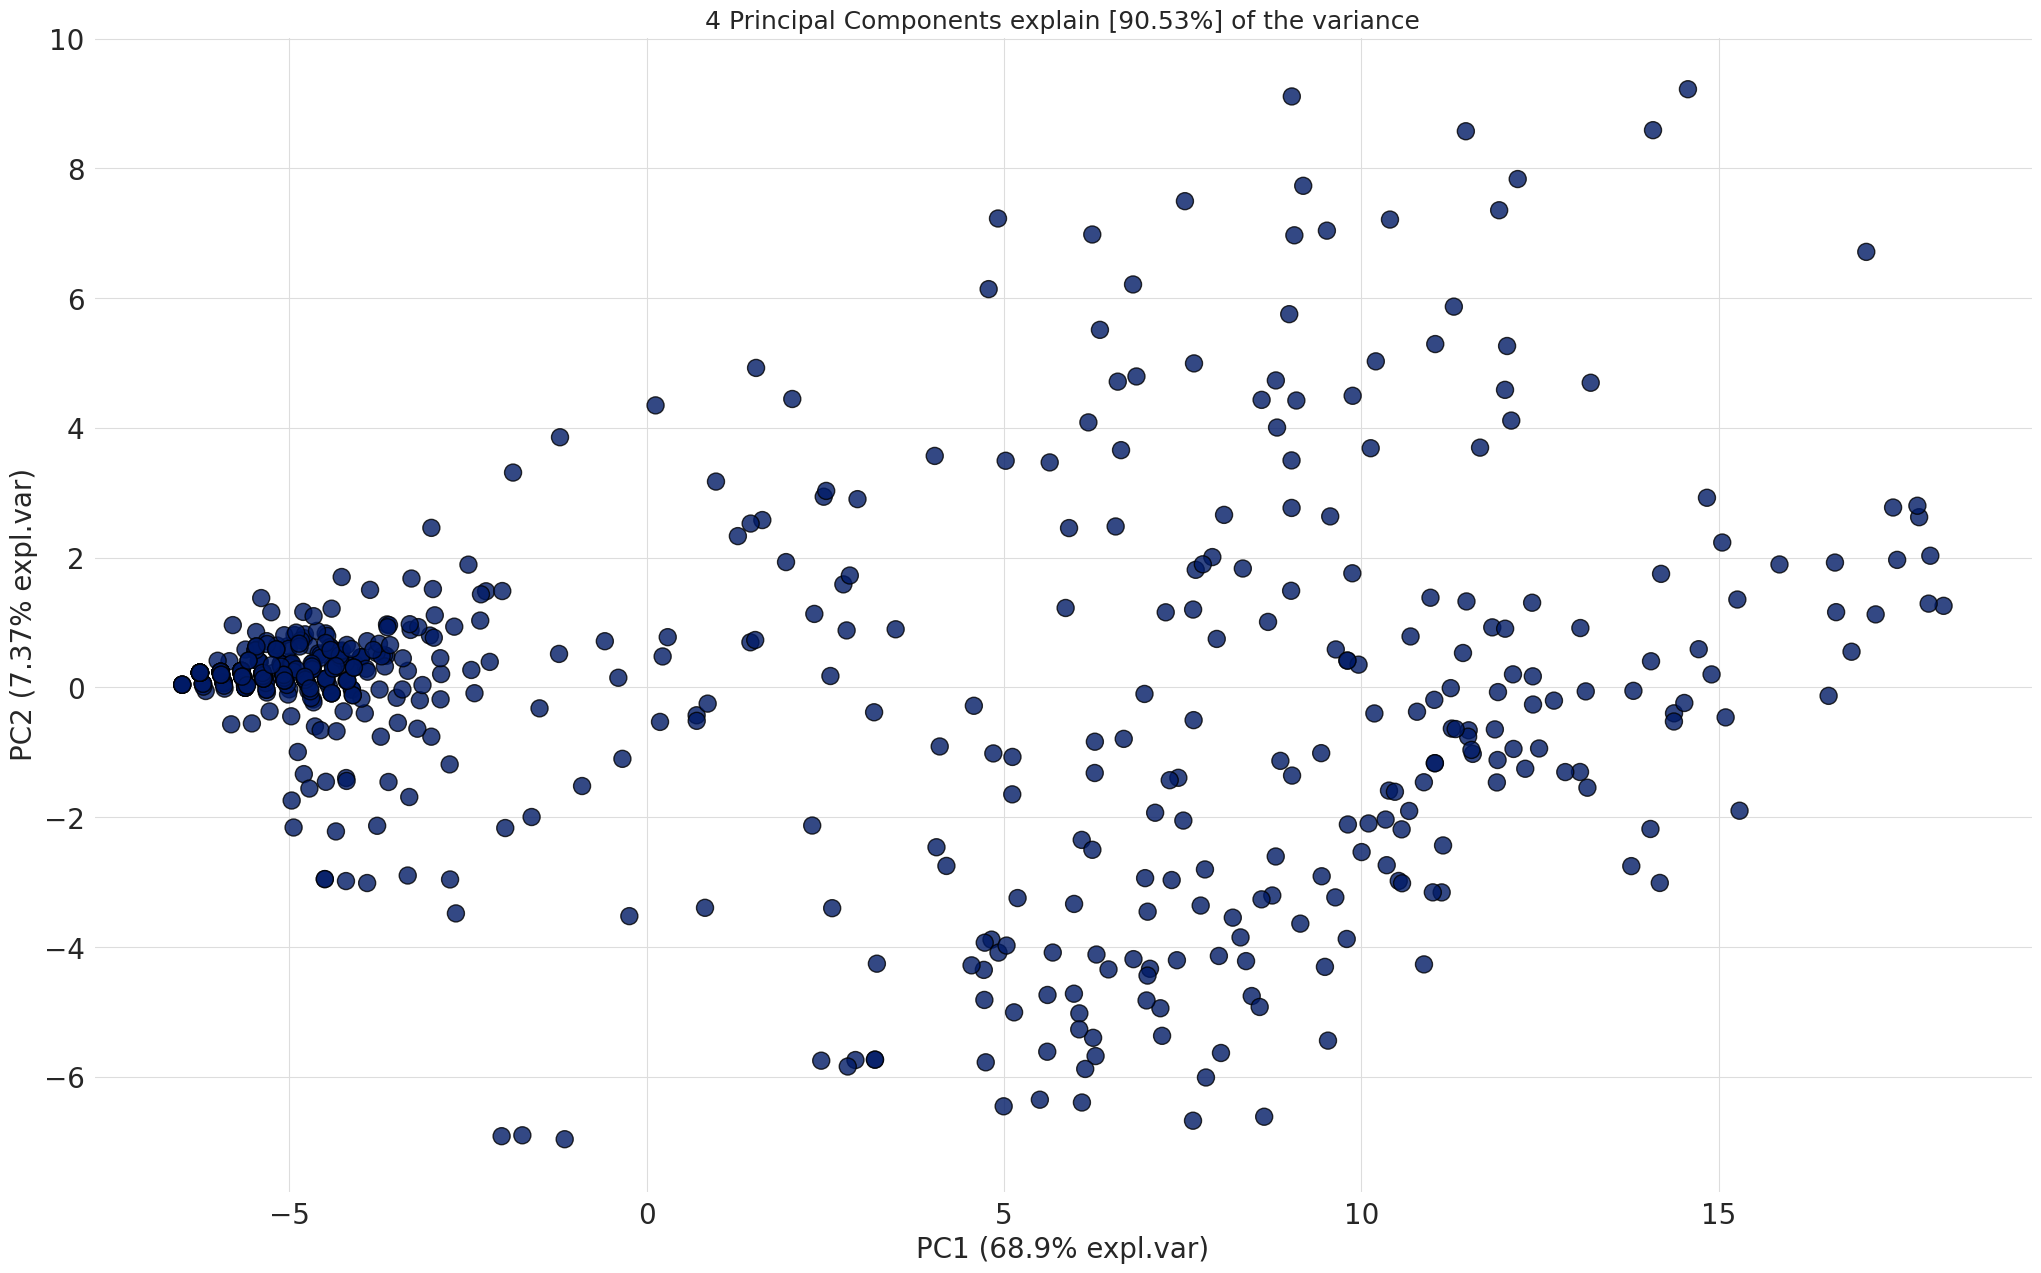

In [43]:
from pca import pca
model = pca(n_components=0.85) # Fit transform
out = model.fit_transform(X)
model.scatter(label=True, legend=False)

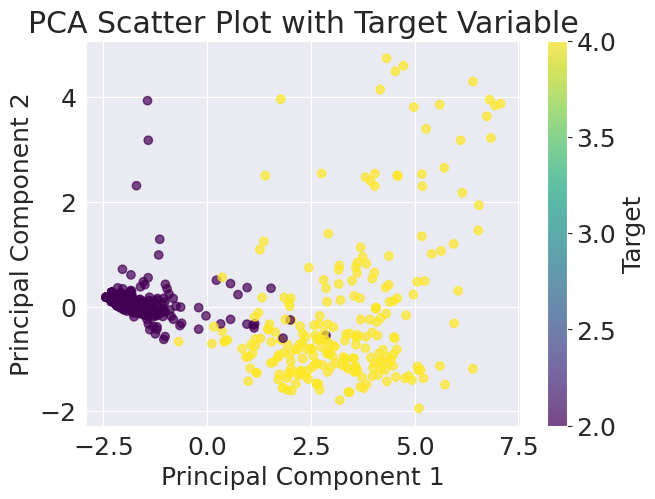

In [44]:
# Scatter Plot of the first two principal components with target color-coding
plt.figure(figsize=(7, 5))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', alpha=0.7)  # Use 'viridis' or any colormap of your choice
plt.colorbar(scatter, label='Target')  # Color bar to show the target variable scale
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Scatter Plot with Target Variable')
plt.grid(True)
plt.show()


[scatterd] >INFO> Create scatterplot


[pca] >Plot PC1 vs PC2 vs PC3 with loadings.
[scatterd]> WARNING use the standardized verbose status. The status [1-6] will be deprecated in future versions.


(<Figure size 3000x2500 with 1 Axes>,
 <Axes3D: title={'center': '4 Principal Components explain [90.53%] of the variance'}, xlabel='PC1 (68.9% expl.var)', ylabel='PC2 (7.37% expl.var)', zlabel='PC3 (6.01% expl.var)'>)

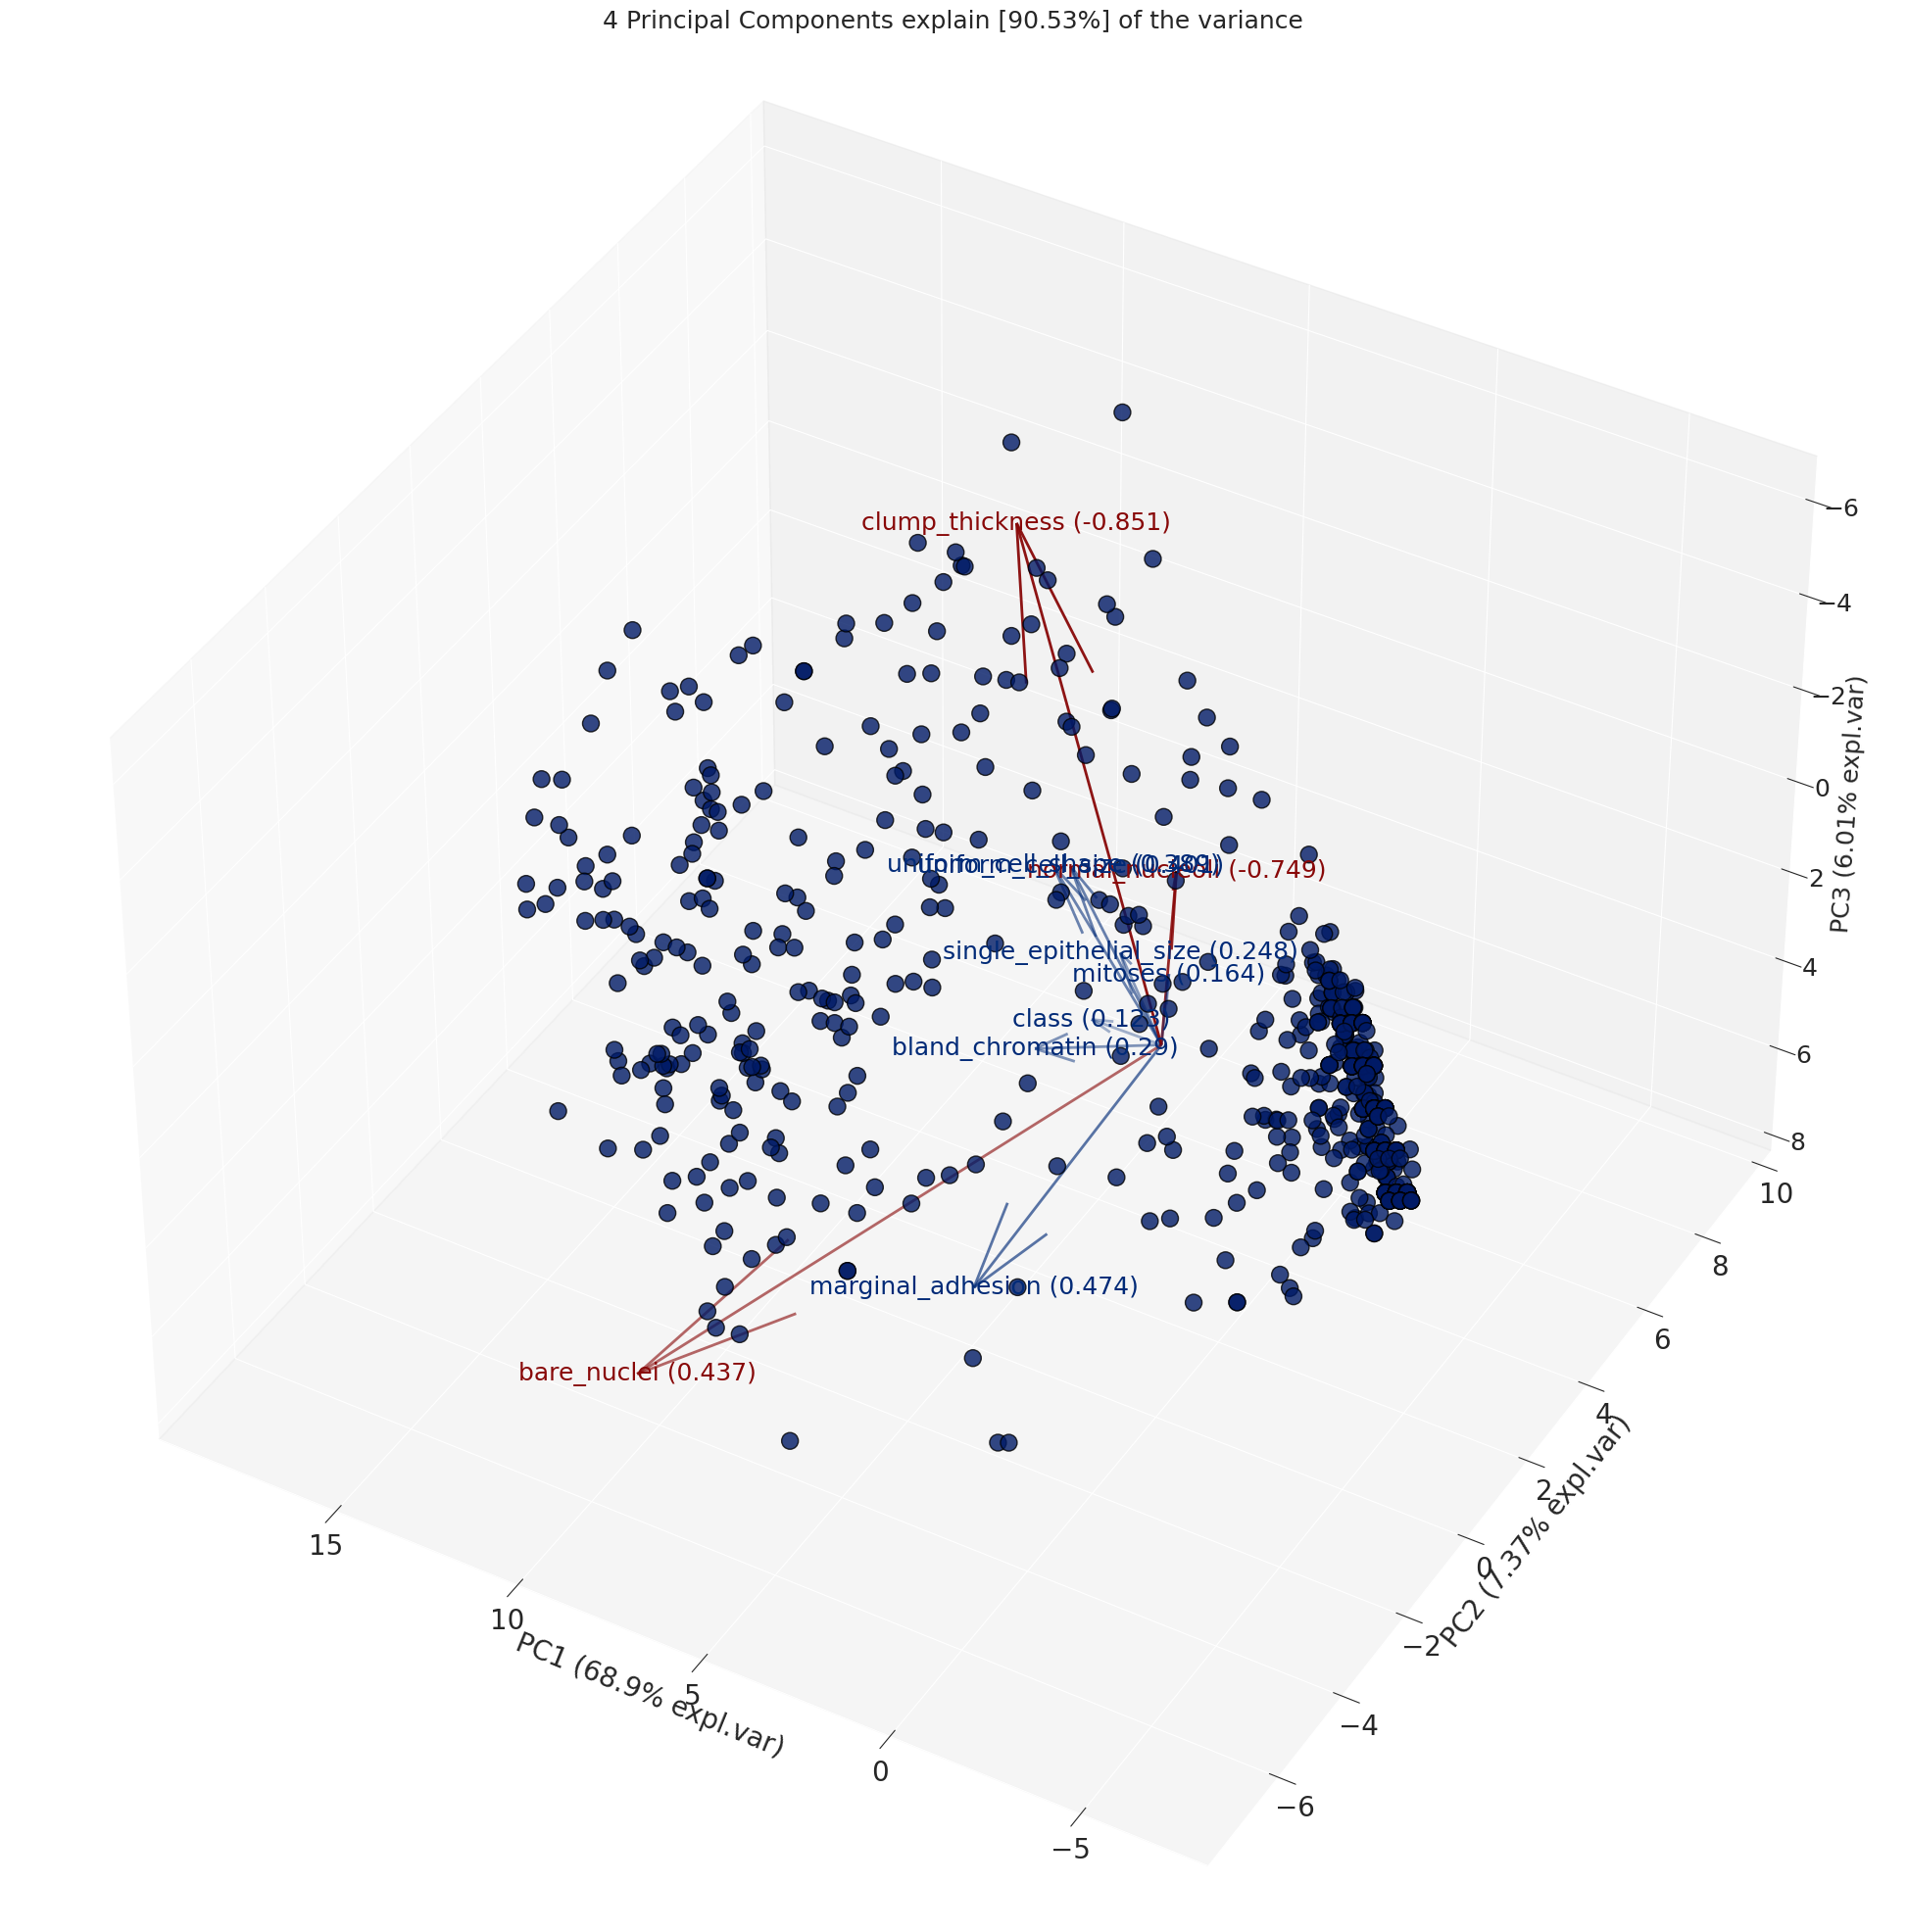

In [45]:
model.biplot3d(legend=False)

**Model Selection**

* Analyse and build a model to predict if a given set of symptoms lead to breast cancer. This is a binary classification problem, and a few algorithms are appropriate for use.

* We will use 10 fold cross validation for each testing.

* The following non-linear algorithms will be used, namely:
  * Classification and Regression Trees (CART)
  * Linear Support Vector Machines (SVM)
  * Gaussian Naive Bayes (NB)
  * k-Nearest Neighbors (KNN).

**Split the data**

In [46]:
Y = df['class'].values
X = df.drop('class', axis=1).values

X_train, X_test, Y_train, Y_test = train_test_split (X, Y, test_size = 0.30, random_state=21)

In [47]:
# Testing Options
scoring = 'accuracy'

In [48]:
# Define models to train
models= []
models.append(('CART', DecisionTreeClassifier()))
models.append(('SVM', SVC()))
models.append(('NB', GaussianNB()))
models.append(('KNN', KNeighborsClassifier()))

# evaluate each model in turn
results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=10)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "For %s Model:Mean accuracy is %f (Std accuracy is %f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

For CART Model:Mean accuracy is 0.946769 (Std accuracy is 0.021051)
For SVM Model:Mean accuracy is 0.971386 (Std accuracy is 0.013512)
For NB Model:Mean accuracy is 0.963223 (Std accuracy is 0.025463)
For KNN Model:Mean accuracy is 0.971386 (Std accuracy is 0.016306)


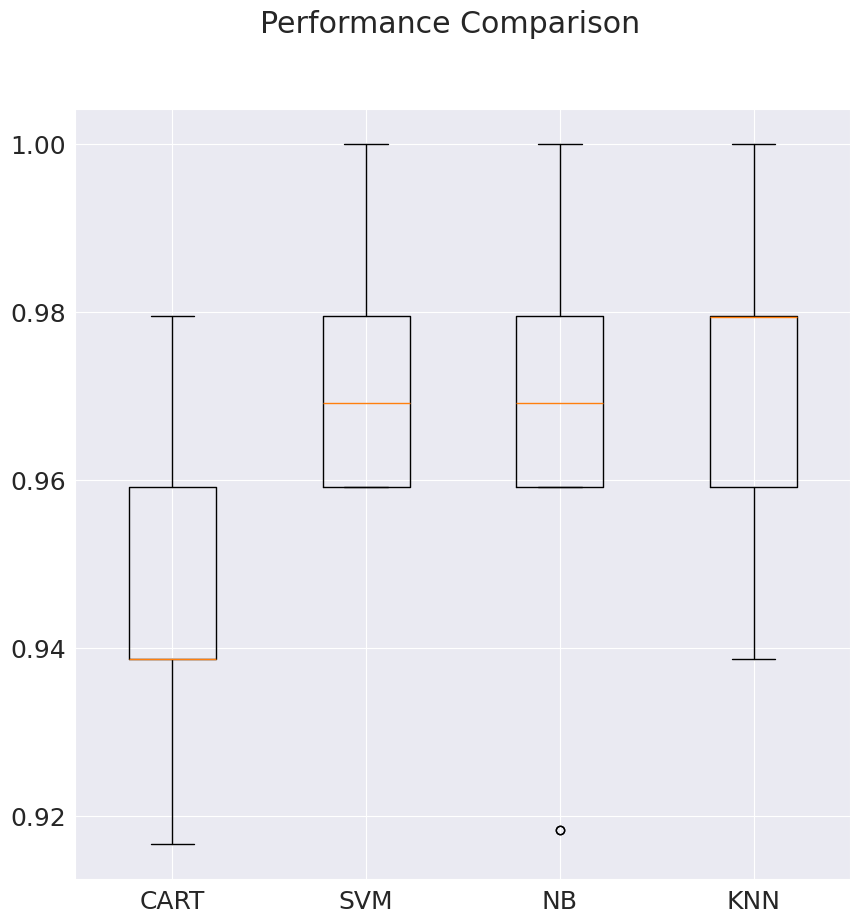

In [49]:
fig = plt.figure(figsize=(10,10))
fig.suptitle('Performance Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

**Predictions**

* **Accuracy** - ratio of correctly predicted observation to the total observations.
* **Precision** - (false positives) ratio of correctly predicted positive observations to the total predicted positive observations
* **Recall** (Sensitivity) - (false negatives) ratio of correctly predicted positive observations to the all observations in actual class - yes.
* **F1 score** - F1 Score is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false



In [50]:
for name, model in models:
    model.fit(X_train, Y_train)
    predictions = model.predict(X_test)
    print("\nModel:",name)
    print("Accuracy score:",accuracy_score(Y_test, predictions))
    print("Classification report:\n",classification_report(Y_test, predictions))


Model: CART
Accuracy score: 0.9047619047619048
Classification report:
               precision    recall  f1-score   support

           2       0.90      0.96      0.93       133
           4       0.93      0.81      0.86        77

    accuracy                           0.90       210
   macro avg       0.91      0.88      0.89       210
weighted avg       0.91      0.90      0.90       210


Model: SVM
Accuracy score: 0.9714285714285714
Classification report:
               precision    recall  f1-score   support

           2       0.98      0.98      0.98       133
           4       0.96      0.96      0.96        77

    accuracy                           0.97       210
   macro avg       0.97      0.97      0.97       210
weighted avg       0.97      0.97      0.97       210


Model: NB
Accuracy score: 0.9523809523809523
Classification report:
               precision    recall  f1-score   support

           2       0.96      0.96      0.96       133
           4       0.94 

**Support Vector Machine**

In [51]:
clf = SVC()

clf.fit(X_train, Y_train)
accuracy = clf.score(X_test, Y_test)
print("Test Accuracy:",accuracy)

predict = clf.predict(X_test)
predict

Test Accuracy: 0.9714285714285714


array([2, 2, 2, 2, 4, 2, 2, 4, 4, 2, 2, 2, 2, 2, 4, 2, 4, 4, 4, 2, 4, 4,
       2, 4, 2, 2, 2, 4, 2, 2, 4, 4, 4, 2, 4, 4, 4, 2, 2, 4, 2, 2, 2, 2,
       2, 2, 4, 4, 2, 2, 4, 4, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4,
       2, 4, 2, 2, 2, 4, 2, 2, 4, 4, 4, 2, 2, 2, 2, 2, 4, 2, 4, 2, 2, 4,
       2, 4, 4, 4, 2, 4, 4, 2, 2, 2, 2, 2, 4, 2, 2, 2, 4, 4, 4, 4, 2, 2,
       2, 4, 4, 4, 2, 2, 2, 4, 2, 4, 4, 2, 2, 2, 2, 2, 2, 2, 4, 4, 2, 2,
       2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 4, 4, 4, 2, 4, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 4, 4, 4, 2, 4, 2, 4, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4,
       4, 2, 4, 2, 4, 2, 2, 2, 2, 2, 4, 4, 2, 4, 2, 4, 4, 4, 2, 4, 2, 2,
       2, 2, 2, 4, 2, 2, 2, 2, 2, 4, 2, 2])

In [52]:
example_measures = [[4,2,1,1,1,2,3,2,1]]
prediction = clf.predict(example_measures)
print(prediction)

[2]


In [53]:
import itertools
sns.set_theme(style="dark")
def plot_confusion_matrix(cm, classes, normalize=False,title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

           2       0.98      0.98      0.98       133
           4       0.96      0.96      0.96        77

    accuracy                           0.97       210
   macro avg       0.97      0.97      0.97       210
weighted avg       0.97      0.97      0.97       210

Confusion matrix, without normalization
[[130   3]
 [  3  74]]


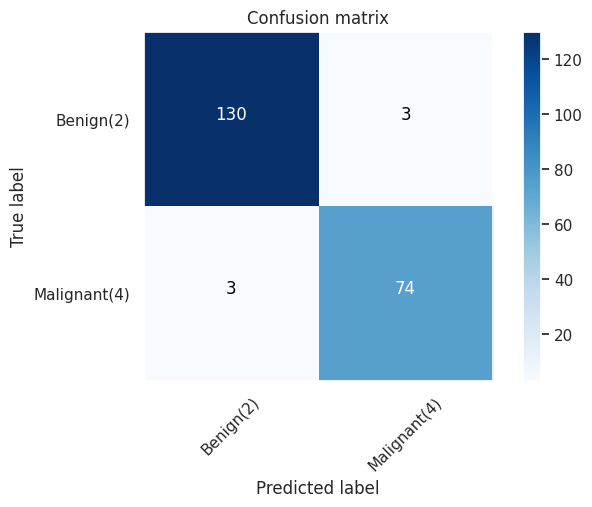

In [54]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(Y_test, predict, labels=[2,4])
np.set_printoptions(precision=2)

print (classification_report(Y_test, predict))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Benign(2)','Malignant(4)'],normalize= False,  title='Confusion matrix')

In [55]:
import pickle
pickle.dump(clf, open('model.pkl','wb'))

model = pickle.load(open('model.pkl','rb'))
print(model.predict([[4,2,1,1,1,2,3,2,1]]))

[2]


**Multiclass Classification with PyCaret**

In [56]:
data = df.sample(frac=0.9, random_state=786)
data_unseen = df.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (629, 10)
Unseen Data For Predictions: (70, 10)


In [57]:
# Setting up the Environment in PyCaret
from pycaret.classification import *
clf = setup(data=data, target='class', train_size=0.7, session_id=123)

In [58]:
 #show the best model and their statistics
 best_model = compare_models()

Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [59]:
best_model

AdaBoostClassifier(algorithm='SAMME.R', estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=123)

**Decision Tree Classifier**




In [60]:
# Create Decision Tree Classifier
dt = create_model('dt')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [61]:
#trained model object is stored in the variable 'dt'.
dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, random_state=123, splitter='best')

**Tuned Decision Tree Model**

In [62]:
# Tune Decision Tree Model
tuned_dt = tune_model(dt)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [63]:
#tuned model object is stored in the variable 'tuned_dt'.
tuned_dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=1.0, max_leaf_nodes=None,
                       min_impurity_decrease=0.002, min_samples_leaf=5,
                       min_samples_split=5, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, random_state=123, splitter='best')

In [64]:
# Evaluate Decision Tree Model
evaluate_model(tuned_dt)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

**K Neighbors Model**

In [65]:
# Create K Neighbors Model
knn = create_model('knn')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

**Tuned K Neighbors Model**

In [66]:
tuned_knn = tune_model(knn, custom_grid = {'n_neighbors' : np.arange(0,50,1)})

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [67]:
# Evaluate K Neighbors Model
evaluate_model(tuned_knn)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

**Tune the Best Model**

In [68]:
# Tune hyperparameters
tuned_best_model = tune_model(best_model)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [69]:
tuned_best_model

AdaBoostClassifier(algorithm='SAMME.R', estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=123)

In [70]:
# Evaluate the Best Model
evaluate_model(tuned_best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

**Classification + PCA**

In [71]:
clf_pca = setup(data=df, target='class', train_size=0.7, session_id=123, normalize = True, pca = True, pca_components = 3)


In [72]:
#show the best model and their statistics
best_model_pca = compare_models()

Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [73]:
best_model_pca

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.001, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=-1, penalty='l2',
              power_t=0.5, random_state=123, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

**Tune the Best Model PCA**

In [74]:
# Tune hyperparameters
tuned_best_model_pca = tune_model(best_model_pca)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [75]:
tuned_best_model_pca

SGDClassifier(alpha=0.05, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.001,
              fit_intercept=False, l1_ratio=0.8900000001,
              learning_rate='optimal', loss='hinge', max_iter=1000,
              n_iter_no_change=5, n_jobs=-1, penalty='l2', power_t=0.5,
              random_state=123, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [76]:
# Evaluate the Best Model PCA
evaluate_model(tuned_best_model_pca)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

**Explainable AI**

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


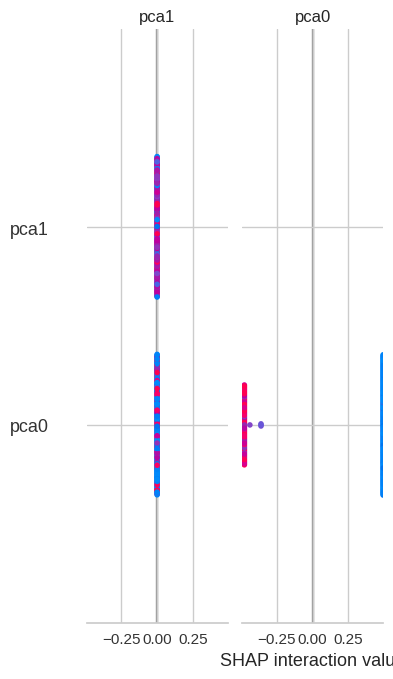

In [77]:
!pip install shap
rf_pca = create_model('rf')
tuned_rf_pca = tune_model(rf_pca)
interpret_model(tuned_rf_pca, plot='summary')